<a href="https://colab.research.google.com/github/kohathyli/Application-of-Quantitative-and-Algorithmic-Strategies-in-Portfolio-Trading/blob/main/Quantitative_Strategies_and_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import to_datetime

In [ ]:
start='2013-01-01'

In [ ]:
overall = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [ ]:
overall

In [ ]:
overall.at[11, 'Date added'] = '2013-09-23'
overall.at[10, 'Date added'] = '2019-04-02'

In [ ]:
stocks = overall.Symbol.to_list()
stocks

In [ ]:
overall = overall[overall['Date added'] >= start]
overall

In [ ]:
data = {'Date': ['2020-08-31','2020-08-31','2020-08-31','2019-04-02','2018-06-26','2015-03-19','2013-09-23','2013-09-23','2013-09-23'],
      'Company': ['XOM','PFE','RTX','DD','GE','T','AA','BAC','HPQ']}

In [ ]:
removed = pd.DataFrame(data)
removed['Date'] = pd.to_datetime(removed['Date'])
removed.set_index('Date', inplace=True)
removed

In [ ]:
stocks.extend(removed.Company.to_list())

In [ ]:
#name = 'KFT'
#s = pd.DataFrame(yf.download(name,start=start)['Close'])
#s = s.rename(columns={'Close': name})
#s

In [ ]:
df_dj = yf.download(stocks, start=start)['Close']
df_dj.index = pd.to_datetime(df_dj.index)
df_dj

[*********************100%%**********************]  39 of 39 completed


,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,21.602970,19.608213,89.150002,58.750000,77.070000,12.030000,93.500000,42.792500,20.340000,110.389999,...,69.389999,52.863438,26.435045,72.860001,54.540001,38.845001,44.270000,38.060001,69.239998,88.709999
2013-01-03,21.795210,19.360714,88.589996,59.000000,77.470001,11.960000,94.400002,42.177502,20.450001,109.919998,...,68.949997,53.058529,26.450151,73.419998,51.990002,38.875000,44.060001,37.790001,68.800003,88.550003
2013-01-04,22.251780,18.821428,88.980003,59.610001,77.690002,12.110000,94.919998,42.402500,20.480000,110.500000,...,69.089996,53.480175,26.608761,74.059998,52.090000,39.192501,44.299999,37.180000,69.059998,88.959999
2013-01-07,21.867300,18.710714,88.529999,59.860001,76.129997,12.090000,95.209999,42.244999,20.290001,109.750000,...,68.620003,53.222153,26.729607,73.059998,52.090000,39.472500,44.689999,38.029999,68.400002,87.930000
2013-01-08,21.867300,18.761070,88.150002,60.200001,74.129997,11.980000,94.000000,42.492500,20.309999,109.260002,...,68.510002,52.580238,25.944109,73.190002,51.400002,39.840000,43.099998,38.169998,68.589996,88.480003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,25.530001,182.889999,273.260010,153.009995,191.830002,27.889999,234.820007,211.470001,53.000000,142.399994,...,150.009995,83.199997,15.650000,168.559998,536.729980,243.910004,35.770000,21.000000,164.300003,102.930000
2023-11-09,24.580000,182.410004,264.059998,152.369995,193.330002,27.530001,234.149994,210.009995,52.000000,141.940002,...,150.350006,82.430000,15.630000,168.589996,539.000000,241.639999,35.619999,20.450001,163.919998,102.959999
2023-11-10,24.639999,186.399994,267.309998,154.380005,196.649994,27.680000,239.679993,213.630005,52.590000,142.949997,...,151.410004,82.220001,15.640000,169.960007,541.210022,245.250000,35.709999,20.760000,166.190002,103.750000


In [ ]:
def pricefilter_rem(ticker):
  df_dj[ticker] = df_dj[ticker][df_dj[ticker].index <= removed[removed.Company == ticker].index[0]]

In [ ]:
def pricefilter_add(ticker):
  df_dj[ticker] = df_dj[ticker][df_dj[ticker].index >= overall[overall.Symbol == ticker]['Date added'].values[0]]

In [ ]:
for ticker_rem in removed.Company:
  pricefilter_rem(ticker_rem)
for ticker_add in overall.Symbol:
  pricefilter_add(ticker_add)

In [ ]:
df_dj

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,21.60297,NaN,NaN,58.750000,77.070000,12.03,93.500000,NaN,20.340000,110.389999,...,69.389999,52.863438,26.435045,72.860001,54.540001,NaN,44.270000,NaN,69.239998,88.709999
2013-01-03,21.79521,NaN,NaN,59.000000,77.470001,11.96,94.400002,NaN,20.450001,109.919998,...,68.949997,53.058529,26.450151,73.419998,51.990002,NaN,44.060001,NaN,68.800003,88.550003
2013-01-04,22.25178,NaN,NaN,59.610001,77.690002,12.11,94.919998,NaN,20.480000,110.500000,...,69.089996,53.480175,26.608761,74.059998,52.090000,NaN,44.299999,NaN,69.059998,88.959999
2013-01-07,21.86730,NaN,NaN,59.860001,76.129997,12.09,95.209999,NaN,20.290001,109.750000,...,68.620003,53.222153,26.729607,73.059998,52.090000,NaN,44.689999,NaN,68.400002,87.930000
2013-01-08,21.86730,NaN,NaN,60.200001,74.129997,11.98,94.000000,NaN,20.309999,109.260002,...,68.510002,52.580238,25.944109,73.190002,51.400002,NaN,43.099998,NaN,68.589996,88.480003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,NaN,182.889999,273.260010,153.009995,191.830002,NaN,234.820007,211.470001,53.000000,142.399994,...,150.009995,NaN,NaN,168.559998,536.729980,243.910004,35.770000,21.000000,164.300003,NaN
2023-11-09,NaN,182.410004,264.059998,152.369995,193.330002,NaN,234.149994,210.009995,52.000000,141.940002,...,150.350006,NaN,NaN,168.589996,539.000000,241.639999,35.619999,20.450001,163.919998,NaN
2023-11-10,NaN,186.399994,267.309998,154.380005,196.649994,NaN,239.679993,213.630005,52.590000,142.949997,...,151.410004,NaN,NaN,169.960007,541.210022,245.250000,35.709999,20.760000,166.190002,NaN


In [ ]:
dji = pd.DataFrame(yf.download('^DJI',start='2013-06-23')['Close'])
dji = dji.rename(columns={'Close': 'DJI'})

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dji['ret'] = dji['DJI'].pct_change()

In [ ]:
dji['cumret'] = (1+dji['ret']).cumprod()-1

In [ ]:
dji

,DJI,ret,cumret
Date,,,
2013-06-24,14659.559570,NaN,NaN
2013-06-25,14760.309570,0.006873,0.006873
2013-06-26,14910.139648,0.010151,0.017093
2013-06-27,15024.490234,0.007669,0.024894
2013-06-28,14909.599609,-0.007647,0.017056
...,...,...,...
2023-11-08,34112.269531,-0.001181,1.326964
2023-11-09,33891.941406,-0.006459,1.311934
2023-11-10,34283.101562,0.011541,1.338617


In [ ]:
df_dj_ret = df_dj.pct_change()
df_dj_ret

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.008899,NaN,NaN,0.004255,0.005190,-0.005819,0.009626,NaN,0.005408,-0.004258,...,-0.006341,0.003690,0.000571,0.007686,-0.046755,NaN,-0.004744,NaN,-0.006355,-0.001804
2013-01-04,0.020948,NaN,NaN,0.010339,0.002840,0.012542,0.005508,NaN,0.001467,0.005277,...,0.002030,0.007947,0.005997,0.008717,0.001923,NaN,0.005447,NaN,0.003779,0.004630
2013-01-07,-0.017279,NaN,NaN,0.004194,-0.020080,-0.001651,0.003055,NaN,-0.009277,-0.006787,...,-0.006803,-0.004825,0.004542,-0.013503,0.000000,NaN,0.008804,NaN,-0.009557,-0.011578
2013-01-08,0.000000,NaN,NaN,0.005680,-0.026271,-0.009098,-0.012709,NaN,0.000986,-0.004465,...,-0.001603,-0.012061,-0.029387,0.001779,-0.013246,NaN,-0.035578,NaN,0.002778,0.006255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000000,0.005885,0.007930,0.000196,0.002194,0.000000,-0.000426,-0.001747,-0.002447,-0.013919,...,-0.003852,0.000000,0.000000,-0.008412,-0.002045,-0.003514,-0.004730,-0.030023,-0.008150,0.000000
2023-11-09,0.000000,-0.002625,-0.033668,-0.004183,0.007819,0.000000,-0.002853,-0.006904,-0.018868,-0.003230,...,0.002267,0.000000,0.000000,0.000178,0.004229,-0.009307,-0.004194,-0.026190,-0.002313,0.000000
2023-11-10,0.000000,0.021874,0.012308,0.013192,0.017173,0.000000,0.023617,0.017237,0.011346,0.007116,...,0.007050,0.000000,0.000000,0.008126,0.004100,0.014940,0.002527,0.015159,0.013848,0.000000


In [ ]:
equal_weight = 1/30
equal_ret = (equal_weight * df_dj_ret.iloc[:, 1:]).sum(axis=1).loc['2013-06-23':]
equal_cumret = (1+equal_ret).cumprod()-1
equal_cumret

Date
2013-06-24   -0.010333
2013-06-25   -0.002717
2013-06-26    0.006742
2013-06-27    0.015051
2013-06-28    0.008997
                ...   
2023-11-08    1.255335
2023-11-09    1.242321
2023-11-10    1.265902
2023-11-13    1.266647
2023-11-14    1.301458
Length: 2618, dtype: float64

In [ ]:
frequency = '2W'
range = 12

In [ ]:
ret = (1+df_dj_ret).resample(frequency).prod()
ret

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-06,1.030033,1.000000,1.000000,1.014638,1.008045,1.006650,1.015187,1.000000,1.006883,1.000996,...,0.995677,1.011667,1.006571,1.016470,0.955079,1.000000,1.000678,1.000000,0.997400,1.002818
2013-01-20,0.971922,1.000000,1.000000,1.002852,0.965890,0.919901,1.028445,1.000000,1.026367,1.042896,...,1.012303,1.023182,0.949191,1.030381,1.047418,1.000000,0.960271,1.000000,1.002027,1.020683
2013-02-03,1.000000,1.000000,1.000000,1.002175,0.997735,1.051167,1.019156,1.000000,0.990961,1.010934,...,1.085502,1.033237,1.061902,1.046914,1.022177,1.000000,1.047485,1.000000,1.018642,0.991630
2013-02-17,1.035556,1.000000,1.000000,1.029711,1.002137,1.027327,0.961001,1.000000,1.007681,0.986781,...,1.008167,1.010463,0.995776,1.006259,1.027793,1.000000,0.996409,1.000000,0.983118,0.981342
2013-03-03,0.905579,1.000000,1.000000,1.011023,1.029988,0.942643,0.955549,1.000000,0.992377,1.016875,...,0.999347,0.992840,1.018382,1.003732,0.933706,1.000000,1.052252,1.000000,1.035209,1.012110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,1.000000,0.978287,1.030838,0.911084,0.921051,1.000000,0.977969,0.944877,0.959315,1.012733,...,0.950414,1.000000,1.000000,0.990959,1.035936,0.954121,0.959159,0.991971,0.971392,1.000000
2023-10-15,1.000000,1.044624,1.057077,1.012802,0.964681,1.000000,0.981465,1.008926,1.000186,0.972957,...,0.991979,1.000000,1.000000,1.005511,1.069835,1.033303,0.946313,1.045414,0.999375,1.000000
2023-10-29,1.000000,0.940565,0.920697,0.935208,0.971770,1.000000,0.890349,0.960800,0.958899,0.879861,...,1.017071,1.000000,1.000000,0.978503,0.972673,0.964657,1.090316,0.909247,1.008384,1.000000


In [ ]:
ret_range = ret.rolling(range).apply(np.prod).dropna()
ret_range

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-09,0.926585,1.000000,1.000000,1.328340,1.329830,1.112219,0.905348,1.000000,1.204031,1.102455,...,1.120478,1.125000,1.012857,1.145210,1.147231,1.000000,1.134854,1.000000,1.102398,1.030887
2013-06-23,0.861771,1.000000,1.000000,1.229827,1.286910,1.047894,0.875685,1.000000,1.195313,1.076290,...,1.120712,1.084726,0.978427,1.067648,1.226723,1.000000,1.117833,1.000000,1.064437,1.005845
2013-07-07,0.867778,1.000000,1.000000,1.276514,1.388593,1.172352,0.841426,1.000000,1.168887,1.045731,...,1.120103,1.110178,1.071471,1.065915,1.212793,1.000000,1.205924,1.000000,1.086850,1.008480
2013-07-21,0.896667,1.000000,1.000000,1.236188,1.428610,1.259607,0.860891,1.000000,1.239558,1.089356,...,1.071786,1.140695,1.008448,1.059707,1.281155,1.000000,1.120960,1.000000,1.107675,1.056975
2013-08-04,0.855150,1.000000,1.000000,1.226941,1.438091,1.233583,0.881707,1.000000,1.247737,1.086900,...,1.062059,1.187156,1.011595,1.044906,1.260642,1.000000,1.131757,1.000000,1.136364,1.040629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,1.000000,1.036317,1.075040,0.914042,0.950275,1.000000,1.220494,1.041767,1.063712,0.977847,...,0.965960,1.000000,1.000000,0.969947,0.985150,0.982865,0.826364,0.629672,1.077115,1.000000
2023-10-15,1.000000,1.054043,1.185034,0.936532,0.894235,1.000000,1.224589,1.031356,1.137989,0.973188,...,0.925246,1.000000,1.000000,0.906536,1.096141,1.021226,0.789853,0.659574,1.058687,1.000000
2023-10-29,1.000000,0.974793,1.122859,0.955249,0.895316,1.000000,1.138494,0.974035,1.103832,0.921658,...,0.943575,1.000000,1.000000,0.882421,1.068054,0.990881,0.889598,0.680399,1.052917,1.000000


In [ ]:
def momentum_strategy(date,n_top,n_bottom,weights):
  all = ret_range.loc[date][ret_range.loc[date] != 1]
  top = all.nlargest(n_top)
  bottom = all.nsmallest(n_bottom)
  middle = all.loc[~(all.isin(top) | all.isin(bottom))]
  top_ret = (ret[top.name:][1:2][top.index]).mean(axis=1).values[0]
  bottom_ret  = (ret[bottom.name:][1:2][bottom.index]).mean(axis=1).values[0]
  middle_ret  = (ret[middle.name:][1:2][middle.index]).mean(axis=1).values[0]
  result = weights[0]*top_ret + weights[1]*middle_ret + weights[2]*bottom_ret
  d = (ret[top.name:][1:2].index).strftime('%Y-%m-%d')[0]
  return result, d

In [ ]:
n_top = 5
n_bottom = 5
weights = [1, 0, 0]

In [ ]:
momentum = pd.DataFrame(columns = ['Date', 'ret'])
for date in ret_range.index[:-1]:
  result, d = momentum_strategy(date,n_top,n_bottom,weights)
  momentum = momentum.append({'Date': d,'ret': result}, ignore_index=True)
momentum['Date'] = pd.to_datetime(momentum['Date'])
momentum.set_index('Date', inplace=True)
momentum['cumret'] = momentum['ret'].cumprod()-1
momentum

<ipython-input-29-a49dda6b6e0a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  momentum = momentum.append({'Date': d,'ret': result}, ignore_index=True)
<ipython-input-29-a49dda6b6e0a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  momentum = momentum.append({'Date': d,'ret': result}, ignore_index=True)
<ipython-input-29-a49dda6b6e0a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  momentum = momentum.append({'Date': d,'ret': result}, ignore_index=True)
<ipython-input-29-a49dda6b6e0a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  momentum = momentum.append({'Date': d,'ret': result}, ignore_index=True)
<ipython-input-29-a49dda6b6e

,ret,cumret
Date,,
2013-06-23,0.957665,-0.042335
2013-07-07,1.041224,-0.002856
2013-07-21,0.983732,-0.019078
2013-08-04,1.024726,0.005177
2013-08-18,0.959896,-0.035135
...,...,...
2023-10-01,0.963713,2.025325
2023-10-15,1.003496,2.035902
2023-10-29,0.946133,1.872366


In [ ]:
window = 110
annual_sd = np.sqrt(252)*df_dj_ret.rolling(window).apply(np.std).dropna(how = 'all')
annual_sd

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,0.192507,NaN,NaN,0.166419,0.201711,0.274640,0.176533,NaN,0.267392,0.134882,...,0.182831,0.144520,0.156389,0.144550,0.215013,NaN,0.173178,NaN,0.129455,0.126077
2013-06-12,0.192113,NaN,NaN,0.170934,0.202369,0.274576,0.175843,NaN,0.267436,0.136100,...,0.182861,0.145532,0.156513,0.144806,0.202157,NaN,0.173249,NaN,0.129348,0.126642
2013-06-13,0.189302,NaN,NaN,0.170617,0.202952,0.274478,0.179346,NaN,0.268199,0.137401,...,0.183422,0.147259,0.158849,0.146244,0.202210,NaN,0.174350,NaN,0.129285,0.129211
2013-06-14,0.188159,NaN,NaN,0.177246,0.200213,0.275002,0.180473,NaN,0.268338,0.138155,...,0.183270,0.147112,0.159587,0.145199,0.202499,NaN,0.174320,NaN,0.128385,0.128601
2013-06-17,0.188154,NaN,NaN,0.177803,0.195746,0.274979,0.179622,NaN,0.270685,0.138307,...,0.183921,0.146405,0.153281,0.146325,0.201446,NaN,0.165583,NaN,0.128352,0.129168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000000,0.196077,0.220743,0.204154,0.269592,0.000000,0.282253,0.238375,0.162419,0.227259,...,0.134675,0.000000,0.000000,0.178006,0.222446,0.149992,0.276958,0.357978,0.124052,0.000000
2023-11-09,0.000000,0.195771,0.225996,0.204023,0.268094,0.000000,0.280846,0.237532,0.164960,0.227207,...,0.134556,0.000000,0.000000,0.177901,0.222441,0.150063,0.276984,0.359535,0.123847,0.000000
2023-11-10,0.000000,0.198436,0.226447,0.200996,0.269226,0.000000,0.281634,0.237982,0.165289,0.227484,...,0.134027,0.000000,0.000000,0.178268,0.219931,0.151362,0.276826,0.360151,0.125375,0.000000


In [ ]:
annual_ret = (df_dj_ret+1).rolling(window).apply(np.prod).dropna(how='all')**(252/window) - 1
annual_ret

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,-0.183190,NaN,NaN,0.831981,0.889714,0.219816,-0.227858,NaN,0.470696,0.244511,...,0.311905,0.283852,0.050444,0.313864,0.438960,NaN,0.332520,NaN,0.210083,0.045770
2013-06-12,-0.210697,NaN,NaN,0.717958,0.831057,0.223320,-0.251027,NaN,0.441599,0.221927,...,0.310951,0.242145,0.039685,0.268430,0.600042,NaN,0.329957,NaN,0.212612,0.031054
2013-06-13,-0.243086,NaN,NaN,0.703264,0.872515,0.220399,-0.220504,NaN,0.486639,0.246599,...,0.337068,0.268914,0.070947,0.291180,0.611369,NaN,0.358560,NaN,0.208075,0.062085
2013-06-14,-0.229747,NaN,NaN,0.574112,0.947097,0.195489,-0.252130,NaN,0.481829,0.233539,...,0.342325,0.274649,0.033981,0.308191,0.591299,NaN,0.357597,NaN,0.230048,0.070390
2013-06-17,-0.231918,NaN,NaN,0.596587,1.125840,0.250950,-0.228840,NaN,0.565661,0.268674,...,0.384337,0.341439,0.096539,0.342447,0.674436,NaN,0.451362,NaN,0.225250,0.080192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000000,0.024731,0.676732,-0.198871,-0.215930,0.000000,0.084727,-0.016697,0.141762,-0.191668,...,0.055409,0.000000,0.000000,-0.083870,0.178593,0.157898,0.080594,-0.595954,0.254454,0.000000
2023-11-09,0.000000,0.036470,0.489900,-0.194205,-0.161492,0.000000,0.124372,0.001638,0.083557,-0.188745,...,0.070581,0.000000,0.000000,-0.074319,0.197663,0.156620,0.078798,-0.621458,0.229195,0.000000
2023-11-10,0.000000,0.094302,0.542736,-0.217449,-0.113714,0.000000,0.136273,0.008415,0.132491,-0.178851,...,0.113125,0.000000,0.000000,-0.064143,0.270119,0.179242,0.067937,-0.616109,0.268928,0.000000


In [ ]:
rf=0

In [ ]:
sharpe_ratio = (annual_ret-rf)/annual_sd
sharpe_ratio

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,-0.951603,NaN,NaN,4.999310,4.410842,0.800381,-1.290738,NaN,1.760323,1.812784,...,1.705980,1.964103,0.322557,2.171310,2.041556,NaN,1.920103,NaN,1.622826,0.363031
2013-06-12,-1.096737,NaN,NaN,4.200200,4.106640,0.813329,-1.427564,NaN,1.651234,1.630613,...,1.700481,1.663862,0.253557,1.853725,2.968204,NaN,1.904526,NaN,1.643729,0.245213
2013-06-13,-1.284118,NaN,NaN,4.121893,4.299117,0.802973,-1.229488,NaN,1.814470,1.794748,...,1.837662,1.826122,0.446632,1.991060,3.023446,NaN,2.056554,NaN,1.609438,0.480493
2013-06-14,-1.221026,NaN,NaN,3.239066,4.730453,0.710864,-1.397050,NaN,1.795602,1.690412,...,1.867875,1.866946,0.212931,2.122545,2.920019,NaN,2.051385,NaN,1.791859,0.547346
2013-06-17,-1.232600,NaN,NaN,3.355330,5.751536,0.912616,-1.274012,NaN,2.089737,1.942589,...,2.089685,2.332155,0.629814,2.340319,3.347972,NaN,2.725890,NaN,1.754936,0.620836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,NaN,0.126131,3.065697,-0.974122,-0.800953,NaN,0.300182,-0.070045,0.872818,-0.843390,...,0.411424,NaN,NaN,-0.471164,0.802859,1.052709,0.290996,-1.664780,2.051191,NaN
2023-11-09,NaN,0.186290,2.167740,-0.951881,-0.602371,NaN,0.442850,0.006897,0.506532,-0.830717,...,0.524545,NaN,NaN,-0.417758,0.888609,1.043696,0.284486,-1.728507,1.850629,NaN
2023-11-10,NaN,0.475225,2.396752,-1.081862,-0.422373,NaN,0.483864,0.035360,0.801571,-0.786213,...,0.844047,NaN,NaN,-0.359810,1.228199,1.184193,0.245414,-1.710696,2.144994,NaN


In [ ]:
date_range_14days = pd.date_range(start=sharpe_ratio.index[0], end=sharpe_ratio.index[-1], freq='14D')
sharpe_ratio = sharpe_ratio[sharpe_ratio.index.isin(date_range_14days)]
sharpe_ratio

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,-0.951603,NaN,NaN,4.999310,4.410842,0.800381,-1.290738,NaN,1.760323,1.812784,...,1.705980,1.964103,0.322557,2.171310,2.041556,NaN,1.920103,NaN,1.622826,0.363031
2013-06-25,-1.183710,NaN,NaN,2.928345,4.895358,0.671963,-1.554272,NaN,1.309867,0.496123,...,1.319207,1.136313,0.773812,0.560985,2.345942,NaN,3.195683,NaN,1.326723,-0.068299
2013-07-09,-1.103063,NaN,NaN,4.515309,6.177557,1.841340,-1.558518,NaN,2.161073,0.958780,...,0.757853,1.535167,0.468795,0.847763,2.670370,NaN,2.457633,NaN,1.859613,0.512385
2013-07-23,-1.151050,NaN,NaN,2.626804,6.226388,2.332669,-1.308063,NaN,2.015178,1.741290,...,0.719265,2.769186,0.158447,0.382669,3.286931,NaN,1.835943,NaN,1.799093,1.345331
2013-08-06,-0.878343,NaN,NaN,2.913572,5.450663,3.427309,-1.278090,NaN,2.584598,0.871916,...,0.926824,2.632411,-0.169377,0.336575,4.951446,NaN,1.005039,NaN,1.912188,0.388787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,NaN,1.438314,0.684716,0.003882,-0.301741,NaN,2.640377,1.330741,1.597196,-0.174139,...,0.275669,NaN,NaN,-0.457160,-0.749157,1.063205,-1.256976,-2.210744,1.997129,NaN
2023-10-03,NaN,0.613435,1.081874,-0.674804,-0.575677,NaN,2.354143,0.409842,2.292835,0.065466,...,-0.976832,NaN,NaN,-1.221936,0.588170,0.041977,-1.166043,-1.988295,1.094785,NaN
2023-10-17,NaN,0.255844,2.623320,0.443819,-0.613729,NaN,2.756314,0.232443,2.390091,0.801397,...,-0.821952,NaN,NaN,-1.024305,1.033348,0.678015,-1.429363,-1.579479,1.116957,NaN


In [ ]:
w = 10

In [ ]:
s_ret = (df_dj_ret+1).rolling(w).apply(np.prod).dropna(how='all')
s_ret = s_ret.loc[sharpe_ratio.index[0]:]
s_ret

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,0.958091,NaN,NaN,1.004727,1.016382,0.982771,0.969022,NaN,1.007535,0.960611,...,0.966114,0.976138,0.988391,0.986301,1.009315,NaN,0.987407,NaN,0.973228,0.979216
2013-06-12,0.953380,NaN,NaN,0.985362,1.018064,0.968843,0.962077,NaN,0.994610,0.956012,...,0.983523,0.974348,0.991924,0.973467,1.007577,NaN,1.006657,NaN,0.981766,0.974587
2013-06-13,0.965842,NaN,NaN,0.987786,1.016113,0.955170,0.985303,NaN,0.999179,0.972424,...,0.991655,0.982597,1.022535,0.979186,0.992113,NaN,1.031785,NaN,0.991670,0.991747
2013-06-14,0.955294,NaN,NaN,0.963809,1.028378,0.956808,0.977506,NaN,0.998756,0.979878,...,1.016545,0.990727,1.026293,0.981247,1.018681,NaN,1.053424,NaN,1.000401,1.001216
2013-06-17,0.951878,NaN,NaN,0.965607,1.022732,0.974908,0.974341,NaN,1.013126,0.976872,...,1.016740,0.997375,1.019675,0.993672,1.025000,NaN,1.042129,NaN,0.990223,1.000547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,1.000000,1.068907,1.004042,1.066123,1.079334,1.000000,0.958684,1.073125,1.011450,0.913582,...,0.996082,1.000000,1.000000,1.023250,1.012297,1.029808,1.061739,0.969082,1.009462,1.000000
2023-11-09,1.000000,1.092995,0.979052,1.062997,1.079513,1.000000,0.965846,1.070115,1.012264,0.917221,...,1.003672,1.000000,1.000000,1.025112,1.020138,1.044794,1.033362,0.942396,1.013290,1.000000
2023-11-10,1.000000,1.108073,1.021944,1.092492,1.094385,1.000000,1.004695,1.086788,1.019977,0.990301,...,1.028880,1.000000,1.000000,1.057755,1.031544,1.069699,1.067883,0.982025,1.031147,1.000000


In [ ]:
date_range_14days = pd.date_range(start=s_ret.index[0], end=s_ret.index[-1], freq='14D')
s_ret = s_ret[s_ret.index.isin(date_range_14days)]
s_ret

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,0.958091,NaN,NaN,1.004727,1.016382,0.982771,0.969022,NaN,1.007535,0.960611,...,0.966114,0.976138,0.988391,0.986301,1.009315,NaN,0.987407,NaN,0.973228,0.979216
2013-06-25,0.962333,NaN,NaN,0.957005,0.969730,0.965701,0.985752,NaN,0.997507,0.967065,...,0.981695,0.979718,0.979586,0.955531,0.996872,NaN,1.005181,NaN,0.988306,0.985076
2013-07-09,1.015404,NaN,NaN,1.077767,1.069801,1.100000,1.046737,NaN,1.045719,1.055213,...,1.039044,1.071374,1.033082,1.053950,1.051353,NaN,1.037459,NaN,1.038140,1.054928
2013-07-23,1.029077,NaN,NaN,0.958768,1.029710,1.104213,1.002227,NaN,1.015898,1.032368,...,1.017343,1.072434,1.005899,1.001950,1.069442,NaN,0.988226,NaN,1.019733,1.019927
2013-08-06,0.971745,NaN,NaN,1.018815,0.993042,0.979920,0.965037,NaN,1.025430,0.967625,...,1.009759,1.000761,0.990785,1.001825,1.007566,NaN,0.994639,NaN,0.991343,0.960819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,1.000000,0.943964,1.040550,0.995938,0.918722,1.000000,0.993041,0.986328,0.975201,1.004445,...,1.007610,1.000000,1.000000,1.042397,0.999688,0.992745,0.973761,0.969204,1.019405,1.000000
2023-10-03,1.000000,0.962752,0.987515,0.910260,0.923905,1.000000,0.961741,0.926426,0.960781,0.998385,...,0.947201,1.000000,1.000000,0.962498,1.059938,0.939440,0.957485,1.023604,0.973742,1.000000
2023-10-17,1.000000,1.027552,1.089690,1.064392,0.982426,1.000000,1.013682,1.050093,1.005405,1.003954,...,1.005292,1.000000,1.000000,1.052448,1.053350,1.054150,0.985303,1.013304,1.014646,1.000000


In [ ]:
def sharpe_ratio_strategy(date,n_top,n_bottom,weights):
  all = sharpe_ratio.loc[date][s_ret.loc[date] != 1].dropna()
  top = all.nlargest(n_top)
  bottom = all.nsmallest(n_bottom)
  middle = all.loc[~(all.isin(top) | all.isin(bottom))]
  top_ret = (s_ret[top.name:][1:2][top.index]).mean(axis=1).values[0]
  bottom_ret  = (s_ret[bottom.name:][1:2][bottom.index]).mean(axis=1).values[0]
  middle_ret  = (s_ret[middle.name:][1:2][middle.index]).mean(axis=1).values[0]
  result = weights[0]*top_ret + weights[1]*middle_ret + weights[2]*bottom_ret
  d = (s_ret[top.name:][1:2].index).strftime('%Y-%m-%d')[0]
  return result, d

In [ ]:
n_top_0 = 5
n_bottom_0 = 5
weights_0 = [1, 0, 0]

In [ ]:
sr = pd.DataFrame(columns = ['Date', 'ret'])
for date in sharpe_ratio.index[:-1]:
  result, d = sharpe_ratio_strategy(date,n_top_0,n_bottom_0,weights_0)
  sr = sr.append({'Date': d,'ret': result}, ignore_index=True)
sr['Date'] = pd.to_datetime(sr['Date'])
sr.set_index('Date', inplace=True)
sr['cumret'] = sr['ret'].cumprod()-1
sr

In [ ]:
window_short_term = 10
window_long_term = 110

In [ ]:
moving_average_short_term = df_dj_ret.rolling(window_short_term).apply(np.mean).dropna(how='all')
moving_average_short_term

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-16,-0.001181,NaN,NaN,0.003152,-0.003378,-0.001892,0.001819,NaN,0.003373,0.003215,...,-0.000059,0.001877,-0.005034,0.003654,-0.001469,NaN,-0.006324,NaN,-0.000028,0.000871
2013-01-17,-0.001395,NaN,NaN,0.002924,-0.002660,-0.005554,0.001392,NaN,0.002452,0.004316,...,0.001051,0.002478,-0.005272,0.003349,0.004585,NaN,-0.004356,NaN,0.000088,0.001868
2013-01-18,-0.002819,NaN,NaN,0.000310,-0.003236,-0.008050,0.002847,NaN,0.002639,0.004224,...,0.001236,0.002319,-0.005148,0.003017,0.004687,NaN,-0.003927,NaN,0.000218,0.002070
2013-01-22,0.001131,NaN,NaN,-0.000745,-0.002401,-0.006000,0.002644,NaN,0.002853,0.005485,...,0.001930,0.003400,-0.005094,0.006517,0.007363,NaN,-0.003867,NaN,0.001723,0.003360
2013-01-23,0.000588,NaN,NaN,-0.002105,0.000402,-0.004473,0.003025,NaN,0.001557,0.005155,...,0.003148,0.005292,-0.001650,0.005941,0.008491,NaN,-0.000659,NaN,0.001316,0.002492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000000,0.006768,0.000560,0.006494,0.007719,0.000000,-0.003860,0.007126,0.001174,-0.008701,...,-0.000349,0.000000,0.000000,0.002389,0.001252,0.003018,0.006158,-0.002898,0.000962,0.000000
2023-11-09,0.000000,0.008966,-0.001907,0.006201,0.007736,0.000000,-0.003121,0.006847,0.001253,-0.008306,...,0.000408,0.000000,0.000000,0.002571,0.002024,0.004439,0.003423,-0.005655,0.001339,0.000000
2023-11-10,0.000000,0.010356,0.002342,0.008936,0.009118,0.000000,0.000837,0.008408,0.002017,-0.000874,...,0.002876,0.000000,0.000000,0.005682,0.003134,0.006802,0.006664,-0.001559,0.003094,0.000000


In [ ]:
moving_average_long_term = df_dj_ret.rolling(window_long_term).apply(np.mean).dropna(how='all')
moving_average_long_term

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,-0.000729,NaN,NaN,0.002460,0.002609,0.000938,-0.000964,NaN,0.001669,0.000905,...,0.001145,0.001033,0.000244,0.001125,0.001537,NaN,0.001199,NaN,0.000790,0.000209
2013-06-12,-0.000865,NaN,NaN,0.002208,0.002484,0.000950,-0.001085,NaN,0.001589,0.000833,...,0.001142,0.000903,0.000203,0.000986,0.001948,NaN,0.001192,NaN,0.000798,0.000153
2013-06-13,-0.001034,NaN,NaN,0.002173,0.002574,0.000940,-0.000924,NaN,0.001712,0.000913,...,0.001221,0.000989,0.000323,0.001057,0.001976,NaN,0.001277,NaN,0.000784,0.000272
2013-06-14,-0.000965,NaN,NaN,0.001864,0.002727,0.000859,-0.001088,NaN,0.001700,0.000871,...,0.001236,0.001006,0.000184,0.001108,0.001926,NaN,0.001274,NaN,0.000855,0.000303
2013-06-17,-0.000976,NaN,NaN,0.001921,0.003073,0.001039,-0.000967,NaN,0.001921,0.000983,...,0.001359,0.001209,0.000413,0.001212,0.002128,NaN,0.001534,NaN,0.000839,0.000339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000000,0.000174,0.002149,-0.000796,-0.000822,0.000000,0.000480,0.000046,0.000579,-0.000741,...,0.000250,0.000000,0.000000,-0.000285,0.000750,0.000627,0.000459,-0.003332,0.000931,0.000000
2023-11-09,0.000000,0.000219,0.001684,-0.000773,-0.000557,0.000000,0.000621,0.000118,0.000373,-0.000726,...,0.000307,0.000000,0.000000,-0.000244,0.000814,0.000622,0.000452,-0.003588,0.000850,0.000000
2023-11-10,0.000000,0.000436,0.001823,-0.000892,-0.000336,0.000000,0.000664,0.000146,0.000548,-0.000678,...,0.000461,0.000000,0.000000,-0.000200,0.001045,0.000700,0.000412,-0.003532,0.000977,0.000000


In [ ]:
moving_average_short_term = moving_average_short_term.loc[moving_average_long_term.index[0]:]
moving_average_short_term

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,-0.004219,NaN,NaN,0.000569,0.001726,-0.001635,-0.003117,NaN,0.000785,-0.003965,...,-0.003353,-0.002366,-0.001096,-0.001315,0.001028,NaN,-0.001153,NaN,-0.002673,-0.002053
2013-06-12,-0.004710,NaN,NaN,-0.001350,0.001890,-0.003066,-0.003837,NaN,-0.000510,-0.004440,...,-0.001594,-0.002548,-0.000741,-0.002623,0.000856,NaN,0.000749,NaN,-0.001808,-0.002524
2013-06-13,-0.003417,NaN,NaN,-0.001103,0.001696,-0.004514,-0.001425,NaN,-0.000046,-0.002729,...,-0.000766,-0.001694,0.002310,-0.002030,-0.000710,NaN,0.003220,NaN,-0.000808,-0.000763
2013-06-14,-0.004510,NaN,NaN,-0.003517,0.002885,-0.004344,-0.002210,NaN,-0.000088,-0.001977,...,0.001670,-0.000876,0.002672,-0.001821,0.001884,NaN,0.005292,NaN,0.000064,0.000175
2013-06-17,-0.004869,NaN,NaN,-0.003328,0.002326,-0.002468,-0.002535,NaN,0.001366,-0.002287,...,0.001690,-0.000203,0.002026,-0.000554,0.002506,NaN,0.004216,NaN,-0.000965,0.000107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000000,0.006768,0.000560,0.006494,0.007719,0.000000,-0.003860,0.007126,0.001174,-0.008701,...,-0.000349,0.000000,0.000000,0.002389,0.001252,0.003018,0.006158,-0.002898,0.000962,0.000000
2023-11-09,0.000000,0.008966,-0.001907,0.006201,0.007736,0.000000,-0.003121,0.006847,0.001253,-0.008306,...,0.000408,0.000000,0.000000,0.002571,0.002024,0.004439,0.003423,-0.005655,0.001339,0.000000
2023-11-10,0.000000,0.010356,0.002342,0.008936,0.009118,0.000000,0.000837,0.008408,0.002017,-0.000874,...,0.002876,0.000000,0.000000,0.005682,0.003134,0.006802,0.006664,-0.001559,0.003094,0.000000


In [ ]:
date_range_14days = pd.date_range(start=moving_average_long_term.index[0], end=moving_average_long_term.index[-1], freq='14D')
moving_average_long_term = moving_average_long_term[moving_average_long_term.index.isin(date_range_14days)]
moving_average_short_term = moving_average_short_term[moving_average_short_term.index.isin(date_range_14days)]

In [ ]:
moving_average_long_term

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-11,-0.000729,NaN,NaN,0.002460,0.002609,0.000938,-0.000964,NaN,0.001669,0.000905,...,0.001145,0.001033,0.000244,0.001125,0.001537,NaN,0.001199,NaN,0.000790,2.092330e-04
2013-06-25,-0.000964,NaN,NaN,0.001787,0.002646,0.000807,-0.001253,NaN,0.001346,0.000315,...,0.000994,0.000684,0.000525,0.000391,0.001649,NaN,0.001834,NaN,0.000690,-5.979608e-07
2013-07-09,-0.000892,NaN,NaN,0.002515,0.003157,0.001713,-0.001253,NaN,0.001968,0.000560,...,0.000599,0.000918,0.000343,0.000561,0.001835,NaN,0.001477,NaN,0.000940,2.996896e-04
2013-07-23,-0.000937,NaN,NaN,0.001721,0.003417,0.001997,-0.001020,NaN,0.001867,0.000920,...,0.000579,0.001515,0.000151,0.000306,0.002273,NaN,0.001184,NaN,0.000906,6.805437e-04
2013-08-06,-0.000612,NaN,NaN,0.001886,0.003097,0.002531,-0.000961,NaN,0.002213,0.000492,...,0.000712,0.001412,-0.000058,0.000272,0.002957,NaN,0.000737,NaN,0.000901,2.255021e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,0.000000,0.001101,0.000608,0.000102,-0.000195,0.000000,0.002309,0.001262,0.001047,-0.000061,...,0.000190,0.000000,0.000000,-0.000286,-0.000634,0.000656,-0.001335,-0.004191,0.000843,0.000000e+00
2023-10-03,0.000000,0.000550,0.000895,-0.000547,-0.000518,0.000000,0.002135,0.000510,0.001349,0.000132,...,-0.000516,0.000000,0.000000,-0.000796,0.000583,0.000076,-0.001190,-0.003737,0.000507,0.000000e+00
2023-10-17,0.000000,0.000257,0.001861,0.000425,-0.000575,0.000000,0.002386,0.000337,0.001362,0.000667,...,-0.000434,0.000000,0.000000,-0.000661,0.000925,0.000426,-0.001503,-0.002720,0.000544,0.000000e+00


In [ ]:
def trend_strategy(date):
  stocks = s_ret.loc[date][moving_average_long_term.columns[moving_average_short_term.loc[date] > moving_average_long_term.loc[date]]]
  result = (s_ret[stocks.name:][1:2][stocks.index]).mean(axis=1).values[0]
  d = (s_ret[stocks.name:][1:2].index).strftime('%Y-%m-%d')[0]
  return result, d

In [ ]:
trend_trading = pd.DataFrame(columns = ['Date', 'ret'])
for date in moving_average_long_term.index[:-1]:
  result, d = trend_strategy(date)
  trend_trading = trend_trading.append({'Date': d,'ret': result}, ignore_index=True)
trend_trading['Date'] = pd.to_datetime(trend_trading['Date'])
trend_trading.set_index('Date', inplace=True)
trend_trading['cumret'] = trend_trading['ret'].cumprod()-1
trend_trading

In [ ]:
dji_trend = pd.DataFrame(yf.download('^DJI',start=s_ret.index[0])['Close'])
dji_trend = dji.rename(columns={'Close': 'DJI'})
dji_trend_ret = dji_trend.pct_change()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
w_short_term = 10
w_long_term = 110

In [ ]:
dji_trend_short_term = dji_trend_ret.rolling(w_short_term).apply(np.mean).dropna()

In [ ]:
dji_trend_long_term = dji_trend_ret.rolling(w_long_term).apply(np.mean).dropna()

In [ ]:
dji_trend_short_term = dji_trend_short_term.loc[dji_trend_long_term.index[0]:]
dji_trend_short_term

,DJI
Date,
2013-11-14,0.002120
2013-11-15,0.002210
2013-11-18,0.002149
2013-11-19,0.002226
2013-11-20,0.000988
...,...
2023-11-08,0.003247
2023-11-09,0.003363
2023-11-10,0.005636


In [ ]:
date_range_14days = pd.date_range(start=dji_trend_long_term.index[0], end=dji_trend_long_term.index[-1], freq='14D')
dji_trend_long_term = dji_trend_long_term[dji_trend_long_term.index.isin(date_range_14days)]
dji_trend_short_term = dji_trend_short_term[dji_trend_short_term.index.isin(date_range_14days)]
dji_trend_short_term

,DJI
Date,
2013-11-14,0.002120
2013-12-12,-0.002231
2013-12-26,0.003965
2014-01-09,0.000542
2014-01-23,-0.001607
...,...
2023-09-07,0.000100
2023-09-21,-0.001240
2023-10-05,-0.002812


In [ ]:
w=10
trend_ret = (df_dj_ret+1).rolling(w).apply(np.prod).dropna(how='all')
trend_ret = trend_ret.loc[dji_trend_long_term.index[0]:]
trend_ret = trend_ret[trend_ret.index.isin(date_range_14days)]
trend_ret

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-14,1.0,NaN,NaN,1.001100,1.035172,1.0,1.004798,NaN,0.947252,0.996666,...,1.044211,1.022965,0.971271,1.022596,1.046587,1.017695,0.995249,NaN,1.030358,1.040170
2013-12-12,1.0,NaN,NaN,0.973245,0.986936,1.0,1.010630,NaN,0.964269,0.988319,...,0.976507,0.969330,0.957074,0.952083,0.954949,0.997304,0.963950,NaN,0.969974,1.016631
2013-12-26,1.0,NaN,NaN,1.060787,1.043075,1.0,1.068832,NaN,1.044061,1.022195,...,0.973102,1.037088,1.035641,1.033410,1.037566,1.070699,1.014230,NaN,0.991149,1.070443
2014-01-09,1.0,NaN,NaN,1.002142,1.038734,1.0,0.986800,NaN,1.018442,0.998219,...,0.989054,1.020095,0.959657,0.979774,1.026305,1.014539,0.969784,NaN,1.001025,1.005442
2014-01-23,1.0,NaN,NaN,0.997316,1.003480,1.0,0.992596,NaN,1.012113,0.960256,...,0.975075,1.010471,0.987150,0.948504,0.967998,1.027135,0.986804,NaN,0.963125,0.962577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-07,1.0,0.980345,0.988460,0.983317,0.945183,1.0,1.030766,1.064075,1.014469,1.046405,...,1.002219,1.000000,1.000000,0.998384,0.990540,1.019975,1.018680,0.830445,1.033966,1.000000
2023-09-21,1.0,0.979556,1.059043,0.986797,0.925480,1.0,0.966599,0.937447,0.939250,0.991299,...,0.990559,1.000000,1.000000,1.049418,1.033683,0.957393,0.984620,0.973230,0.990518,1.000000
2023-10-05,1.0,1.005635,0.983928,0.950746,0.931683,1.0,0.958718,0.968362,0.994938,0.992191,...,0.945182,1.000000,1.000000,0.971947,1.030111,0.986771,0.955843,1.034033,0.982460,1.000000


In [ ]:
w = 110
trend_ret_m = (df_dj_ret+1).rolling(w).apply(np.prod).dropna(how='all')
trend_ret_m = trend_ret_m.loc[dji_trend_long_term.index[0]:]
trend_ret_m = trend_ret_m[trend_ret_m.index.isin(date_range_14days)]
trend_ret_m

,AA,AAPL,AMGN,AXP,BA,BAC,CAT,CRM,CSCO,CVX,...,PG,RTX,T,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-14,1.006075,NaN,NaN,1.070178,1.327666,1.077744,1.002874,NaN,0.887827,0.984438,...,1.079365,1.160226,0.983221,1.075171,1.117472,NaN,1.001794,NaN,1.050897,1.030511
2013-12-12,1.046776,NaN,NaN,1.073315,1.270157,1.045085,1.002813,NaN,0.815183,0.981504,...,1.034309,1.102734,0.951966,1.055820,1.044726,NaN,0.944466,NaN,1.019083,1.021641
2013-12-26,1.019704,NaN,NaN,1.191113,1.293936,0.947721,1.059884,NaN,0.847589,0.982524,...,1.006649,1.103614,0.988196,1.053611,1.036991,NaN,0.978317,NaN,1.006678,1.064009
2014-01-09,1.038896,NaN,NaN,1.174263,1.317238,0.952830,1.064176,NaN,0.843452,0.986715,...,0.989298,1.055117,0.937657,1.043810,1.052865,NaN,0.945274,NaN,0.991619,1.084938
2014-01-23,1.014706,NaN,NaN,1.190839,1.375547,0.987430,1.030515,NaN,0.921569,0.984532,...,0.972167,1.115060,0.983988,1.024670,1.025210,NaN,0.985991,NaN,1.007391,1.099932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-07,1.000000,1.093619,1.053375,0.965335,1.023740,1.000000,1.253362,1.131892,1.104219,1.026172,...,1.041641,1.000000,1.000000,0.940581,1.031379,1.111441,0.874547,0.636442,1.122194,1.000000
2023-09-21,1.000000,1.052781,1.077640,0.947862,0.991275,1.000000,1.216157,1.071719,1.055402,0.957956,...,1.007550,1.000000,1.000000,1.001425,0.979191,1.011067,0.848802,0.607305,1.090517,1.000000
2023-10-05,1.000000,1.030823,1.105698,0.911677,0.900909,1.000000,1.191956,1.018350,1.123175,0.972239,...,0.919555,1.000000,1.000000,0.904715,1.049056,1.003223,0.819469,0.629220,1.053719,1.000000


In [ ]:
def trend_strategy_upgrade(date,n_top,n_bottom,weights):
  all = trend_ret_m.loc[date][trend_ret_m.loc[date] != 1].dropna()
  if (dji_trend_short_term.loc[date] > dji_trend_long_term.loc[date]).loc['DJI']:
    all = trend_ret_m.loc[date][trend_ret_m.loc[date] != 1].dropna()
    top = all.nlargest(n_top)
    bottom = all.nsmallest(n_bottom)
    middle = all.loc[~(all.isin(top) | all.isin(bottom))]
    top_ret = (trend_ret[top.name:][1:2][top.index]).mean(axis=1).values[0]
    bottom_ret  = (trend_ret[bottom.name:][1:2][bottom.index]).mean(axis=1).values[0]
    middle_ret  = (trend_ret[middle.name:][1:2][middle.index]).mean(axis=1).values[0]
    result = weights[0]*top_ret + weights[1]*middle_ret + weights[2]*bottom_ret
    d = (trend_ret[top.name:][1:2].index).strftime('%Y-%m-%d')[0]
  else:
    result = 1
    d = (trend_ret[all.name:][1:2].index).strftime('%Y-%m-%d')[0]
  return result, d

In [ ]:
n_top_1 = 5
n_bottom_1 = 5
weights_1 = [1, 0, 0]

In [ ]:
trend_trading_upgrade = pd.DataFrame(columns = ['Date', 'ret'])
for date in dji_trend_long_term.index[:-1]:
  result, d = trend_strategy_upgrade(date,n_top_1,n_bottom_1,weights_1)
  trend_trading_upgrade = trend_trading_upgrade.append({'Date': d,'ret': result}, ignore_index=True)
trend_trading_upgrade['Date'] = pd.to_datetime(trend_trading_upgrade['Date'])
trend_trading_upgrade.set_index('Date', inplace=True)
trend_trading_upgrade['cumret'] = (trend_trading_upgrade['ret']).cumprod()-1
trend_trading_upgrade

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dji.index, y=dji['cumret'], mode='lines',line=dict(color='red'), name='dow jones'))
fig.add_trace(go.Scatter(x=equal_cumret.index, y=equal_cumret, mode='lines',line=dict(color='blue'), name='equally-weighted dow jones'))
fig.add_trace(go.Scatter(x=momentum.index, y=momentum['cumret'], mode='lines',line=dict(color='orange'), name='momentum trading dow jones'))
fig.add_trace(go.Scatter(x=sr.index, y=sr['cumret'], mode='lines',line=dict(color='green'), name='sharpe ratio trading dow jones'))
fig.add_trace(go.Scatter(x=trend_trading.index, y=trend_trading['cumret'], mode='lines',line=dict(color='purple'), name='trend trading dow jones'))
#fig.add_trace(go.Scatter(x=trend_trading_upgrade.index, y=trend_trading_upgrade['cumret'], mode='lines',line=dict(color='grey'), name='trend trading upgrade dow jones'))
fig.update_layout(
    title={'text':'Cumulative Performance',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

In [ ]:
DJI_stock_list=['^DJI','MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DIS','DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','WBA','WMT']
DJI_stocks = yf.download(DJI_stock_list,start='2013-01-01',end='2023-06-30')['Close']
DJI_stocks

[*********************100%%**********************]  31 of 31 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,19.608213,89.150002,58.750000,77.070000,93.500000,42.792500,20.340000,110.389999,51.099998,NaN,...,27.620001,25.920000,69.389999,72.860001,54.540001,38.845001,44.270000,38.060001,69.239998,13412.549805
2013-01-03,19.360714,88.589996,59.000000,77.470001,94.400002,42.177502,20.450001,109.919998,51.209999,NaN,...,27.250000,26.184999,68.949997,73.419998,51.990002,38.875000,44.060001,37.790001,68.800003,13391.360352
2013-01-04,18.821428,88.980003,59.610001,77.690002,94.919998,42.402500,20.480000,110.500000,52.189999,NaN,...,26.740000,26.440001,69.089996,74.059998,52.090000,39.192501,44.299999,37.180000,69.059998,13435.209961
2013-01-07,18.710714,88.529999,59.860001,76.129997,95.209999,42.244999,20.290001,109.750000,50.970001,NaN,...,26.690001,26.480000,68.620003,73.059998,52.090000,39.472500,44.689999,38.029999,68.400002,13384.290039
2013-01-08,18.761070,88.150002,60.200001,74.129997,94.000000,42.492500,20.309999,109.260002,50.759998,NaN,...,26.549999,26.200001,68.510002,73.190002,51.400002,39.840000,43.099998,38.169998,68.589996,13328.849609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.679993,227.110001,168.070007,205.410004,234.440002,210.089996,50.330002,151.350006,88.099998,51.360001,...,335.019989,109.519997,148.460007,173.720001,477.000000,229.550003,35.509998,31.400000,155.460007,33727.429688
2023-06-26,185.270004,224.729996,167.110001,205.580002,236.949997,207.360001,50.209999,154.009995,88.699997,51.950001,...,328.600006,111.739998,148.610001,172.389999,479.059998,226.300003,36.110001,31.590000,155.050003,33714.710938
2023-06-27,188.059998,222.610001,168.190002,209.429993,240.690002,208.820007,50.860001,153.529999,89.059998,52.570000,...,334.570007,113.610001,150.020004,172.589996,482.559998,227.339996,36.549999,28.639999,154.490005,33926.738281


In [ ]:
DJI_stocks_Rets = pd.DataFrame()
for stock in DJI_stock_list:
  DJI_stocks_Rets[stock]=DJI_stocks[stock].pct_change()
DJI_Rets=DJI_stocks_Rets['^DJI']
DJI_CumRets=(1+DJI_Rets).cumprod()-1
DJI_stocks_Rets

,^DJI,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.001580,-0.001161,0.004255,-0.006282,-0.012622,0.005190,0.009626,-0.004258,0.005408,0.000000,...,-0.013396,0.010224,-0.006341,-0.014372,0.007686,-0.046755,-0.004744,0.000772,-0.007094,-0.006355
2013-01-04,0.003274,0.007394,0.010339,0.004402,-0.027855,0.002840,0.005508,0.005277,0.001467,0.001596,...,-0.018716,0.009738,0.002030,0.005335,0.008717,0.001923,0.005447,0.008167,-0.016142,0.003779
2013-01-07,-0.003790,0.001258,0.004194,-0.005057,-0.005882,-0.020080,0.003055,-0.006787,-0.009277,-0.009559,...,-0.001870,0.001513,-0.006803,-0.003714,-0.013503,0.000000,0.008804,0.007144,0.022862,-0.009557
2013-01-08,-0.004142,0.000105,0.005680,-0.004292,0.002691,-0.026271,-0.012709,-0.004465,0.000986,-0.006970,...,-0.005245,-0.010574,-0.001603,0.005859,0.001779,-0.013246,-0.035578,0.009310,0.003681,0.002778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-0.006460,0.002888,-0.001129,-0.011103,-0.001711,-0.000973,-0.012219,-0.008451,-0.015454,-0.010509,...,-0.013806,-0.008510,-0.009937,-0.015003,-0.007371,-0.004279,-0.009484,0.005079,-0.015365,-0.001862
2023-06-26,-0.000377,-0.003078,-0.005712,-0.010480,-0.007553,0.000828,0.010706,0.017575,-0.002384,0.000327,...,-0.019163,0.020270,0.001010,-0.012994,-0.007656,0.004319,0.016897,-0.014158,0.006051,-0.002637
2023-06-27,0.006289,-0.021412,0.006463,-0.009434,0.015059,0.018727,0.015784,-0.003117,0.012946,-0.002124,...,0.018168,0.016735,0.009488,0.007041,0.001160,0.007306,0.012185,0.004596,-0.093384,-0.003612


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DJI_CumRets.index, y=DJI_CumRets, mode='lines',line=dict(color='red'), name='dow jones'))
fig.update_layout(
    title={'text':'Cumulative Performance - dow jones',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

In [ ]:
DJI_stocks

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,19.608213,89.150002,58.750000,77.070000,93.500000,42.792500,20.340000,110.389999,51.099998,NaN,...,27.620001,25.920000,69.389999,72.860001,54.540001,38.845001,44.270000,38.060001,69.239998,13412.549805
2013-01-03,19.360714,88.589996,59.000000,77.470001,94.400002,42.177502,20.450001,109.919998,51.209999,NaN,...,27.250000,26.184999,68.949997,73.419998,51.990002,38.875000,44.060001,37.790001,68.800003,13391.360352
2013-01-04,18.821428,88.980003,59.610001,77.690002,94.919998,42.402500,20.480000,110.500000,52.189999,NaN,...,26.740000,26.440001,69.089996,74.059998,52.090000,39.192501,44.299999,37.180000,69.059998,13435.209961
2013-01-07,18.710714,88.529999,59.860001,76.129997,95.209999,42.244999,20.290001,109.750000,50.970001,NaN,...,26.690001,26.480000,68.620003,73.059998,52.090000,39.472500,44.689999,38.029999,68.400002,13384.290039
2013-01-08,18.761070,88.150002,60.200001,74.129997,94.000000,42.492500,20.309999,109.260002,50.759998,NaN,...,26.549999,26.200001,68.510002,73.190002,51.400002,39.840000,43.099998,38.169998,68.589996,13328.849609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.679993,227.110001,168.070007,205.410004,234.440002,210.089996,50.330002,151.350006,88.099998,51.360001,...,335.019989,109.519997,148.460007,173.720001,477.000000,229.550003,35.509998,31.400000,155.460007,33727.429688
2023-06-26,185.270004,224.729996,167.110001,205.580002,236.949997,207.360001,50.209999,154.009995,88.699997,51.950001,...,328.600006,111.739998,148.610001,172.389999,479.059998,226.300003,36.110001,31.590000,155.050003,33714.710938
2023-06-27,188.059998,222.610001,168.190002,209.429993,240.690002,208.820007,50.860001,153.529999,89.059998,52.570000,...,334.570007,113.610001,150.020004,172.589996,482.559998,227.339996,36.549999,28.639999,154.490005,33926.738281


In [ ]:
n_stocks = len(DJI_stocks.columns) - 1
equal_weight = 1 / n_stocks
portfolio = pd.DataFrame()
portfolio['Portfolio_Rets'] = (equal_weight * DJI_stocks_Rets.iloc[:, 1:]).sum(axis=1)
portfolio['Portfolio_CumRets'] = (1 + portfolio['Portfolio_Rets']).cumprod() - 1
portfolio


,Portfolio_Rets,Portfolio_CumRets
Date,,
2013-01-02,0.000000,0.000000
2013-01-03,-0.002154,-0.002154
2013-01-04,0.002807,0.000647
2013-01-07,-0.001972,-0.001327
2013-01-08,-0.003652,-0.004974
...,...,...
2023-06-23,-0.005925,2.089458
2023-06-26,0.001307,2.093497
2023-06-27,0.003099,2.103085


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DJI_CumRets.index, y=DJI_CumRets, mode='lines',line=dict(color='red'), name='dow jones'))
fig.add_trace(go.Scatter(x=portfolio.index, y=portfolio['Portfolio_CumRets'], mode='lines',line=dict(color='blue'), name='equally-weighted dow jones stocks'))
fig.update_layout(
    title={'text':'Cumulative Performance',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

In [ ]:
window  =63
cumulative_returns = (DJI_stocks_Rets + 1).rolling(window=window, min_periods=1).apply(lambda x: x.prod()) - 1
portfolio_half_year_returns = pd.DataFrame()
portfolio_half_year_returns = cumulative_returns
portfolio_half_year_returns

,^DJI,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.001580,-0.001161,0.004255,-0.006282,-0.012622,0.005190,0.009626,-0.004258,0.005408,0.000000,...,-0.013396,0.010224,-0.006341,-0.014372,0.007686,-0.046755,-0.004744,0.000772,-0.007094,-0.006355
2013-01-04,0.001689,0.006225,0.014638,-0.001907,-0.040125,0.008045,0.015187,0.000996,0.006883,0.001596,...,-0.031861,0.020062,-0.004323,-0.009114,0.016470,-0.044921,0.000678,0.008946,-0.023121,-0.002600
2013-01-07,-0.002107,0.007491,0.018894,-0.006955,-0.045772,-0.012197,0.018289,-0.005798,-0.002458,-0.007979,...,-0.033671,0.021605,-0.011097,-0.012794,0.002745,-0.044921,0.009487,0.016154,-0.000788,-0.012132
2013-01-08,-0.006240,0.007597,0.024681,-0.011217,-0.043203,-0.038147,0.005348,-0.010236,-0.001475,-0.014894,...,-0.038740,0.010802,-0.012682,-0.007011,0.004529,-0.057572,-0.026429,0.025615,0.002890,-0.009388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,0.050527,-0.002772,0.032625,-0.025697,0.174605,0.037949,0.068356,-0.020515,0.012065,0.021362,...,0.206584,-0.094652,0.032478,0.120839,0.060173,0.015088,-0.049773,0.031268,-0.028766,0.105297
2023-06-26,0.045822,-0.007218,0.045876,-0.055875,0.156131,0.040753,0.091885,-0.013136,-0.005939,0.005255,...,0.171187,-0.074310,0.012882,0.091024,0.045358,0.006450,-0.041158,0.023797,-0.033945,0.093441
2023-06-27,0.046086,-0.031826,0.031081,-0.059765,0.188148,0.044174,0.104083,-0.026134,0.006332,-0.004238,...,0.210543,-0.035651,0.027886,0.091812,0.037511,0.001370,-0.039422,0.024931,-0.130540,0.071582


In [ ]:
portfolio_half_year_returns = portfolio_half_year_returns[portfolio_half_year_returns.index >= '2013-07-01']

In [ ]:
for column in portfolio_half_year_returns.columns:
  portfolio_half_year_returns[column] = ((1 + portfolio_half_year_returns[column])**2) - 1

<ipython-input-11-c67e1f897d4c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
portfolio_half_year_returns

,^DJI,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.043144,0.053071,0.250535,-0.160469,-0.093431,0.507326,-0.050248,0.001345,0.315680,-0.012729,...,0.423382,0.119860,-0.023668,-0.256311,-0.076661,0.129982,0.035049,0.216230,-0.121985,-0.037268
2013-07-02,0.053205,0.058554,0.268641,-0.159999,-0.061525,0.446779,-0.038612,0.023399,0.315998,0.009983,...,0.412236,0.129921,0.008209,-0.179057,-0.090998,0.120158,0.068073,0.264209,-0.077902,-0.033659
2013-07-03,0.053027,0.069784,0.249115,-0.181170,-0.032096,0.466964,-0.064619,0.017182,0.365921,-0.002465,...,0.414103,0.122157,0.000764,-0.141362,-0.091249,0.116373,0.070574,0.262248,-0.103221,-0.037438
2013-07-05,0.079884,0.111870,0.365641,-0.119246,-0.027129,0.462255,-0.057310,0.051532,0.421197,0.022077,...,0.420831,0.164657,0.002814,-0.113383,-0.071418,0.135374,0.071450,0.334447,-0.113975,-0.030655
2013-07-08,0.085399,0.124302,0.379193,-0.127349,-0.051683,0.447480,-0.023380,0.059077,0.433706,-0.015602,...,0.441848,0.129726,-0.000761,-0.151296,-0.068876,0.191621,0.071642,0.279515,-0.095386,-0.014952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,0.103607,-0.005537,0.066314,-0.050734,0.379697,0.077337,0.141384,-0.040609,0.024276,0.043180,...,0.455844,-0.180344,0.066011,0.256279,0.123967,0.030404,-0.097068,0.063514,-0.056704,0.221681
2023-06-26,0.093743,-0.014383,0.093856,-0.108629,0.336639,0.083167,0.192213,-0.026099,-0.011844,0.010537,...,0.371679,-0.143099,0.025929,0.190333,0.092773,0.012941,-0.080621,0.048160,-0.066738,0.195614
2023-06-27,0.094295,-0.062639,0.063129,-0.115958,0.411695,0.090299,0.218998,-0.051585,0.012703,-0.008458,...,0.465415,-0.070030,0.056550,0.192054,0.076430,0.002741,-0.077290,0.050484,-0.244040,0.148288


In [ ]:
window = 63
portfolio_half_year_volatility = 100*np.sqrt(252)*DJI_stocks_Rets.rolling(window=window,min_periods=1).std()
portfolio_half_year_volatility

,^DJI,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,5.448930,9.602675,6.828907,11.992747,17.098330,2.638185,4.621597,10.702141,4.423941,1.791260,...,5.971107,0.544749,9.396935,22.120142,1.157321,54.641007,11.438995,8.300824,10.156106,11.374964
2013-01-07,5.736698,7.000522,5.604125,9.282023,17.868924,22.161935,5.270604,10.099122,12.065860,9.576590,...,13.670100,7.770850,7.892616,15.658655,19.908886,43.759414,11.199547,6.360822,32.406875,11.051309
2013-01-08,5.423208,6.023100,4.599074,7.739988,20.500555,25.287182,15.508722,8.489132,9.953245,8.536753,...,12.160721,15.438629,6.656637,15.094566,16.268330,35.754806,32.085512,6.066156,26.631994,10.523298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,11.224215,29.203721,25.710007,18.996773,18.362361,24.875190,30.545634,22.429328,18.899398,10.368175,...,26.349794,27.056584,14.793518,26.071431,20.796154,24.989672,21.421631,16.821261,24.622130,11.474621
2023-06-26,11.206286,29.209500,25.454844,18.591228,18.436650,24.869656,30.499625,22.620734,18.643806,9.845301,...,26.678106,27.401857,14.235058,26.123521,20.837997,24.872522,21.645414,17.012236,24.540666,11.427052
2023-06-27,11.211281,29.513441,25.154243,18.649438,18.363829,24.958274,30.626602,22.530870,18.823302,9.742415,...,26.612772,27.226608,14.308933,26.129351,20.775606,24.791573,21.686013,17.021801,30.731732,11.039641


In [ ]:
portfolio_half_year_volatility = portfolio_half_year_volatility[portfolio_half_year_volatility.index >= '2013-07-01']

In [ ]:
portfolio_half_year_ir = pd.DataFrame()
for i in DJI_stock_list:
  portfolio_half_year_ir[i] = (portfolio_half_year_returns[i]-portfolio_half_year_returns['^DJI'])/portfolio_half_year_volatility[i]
portfolio_half_year_ir

,^DJI,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.0,0.000624,0.009824,-0.006174,-0.005304,0.023546,-0.004998,-0.002611,0.008433,-0.002656,...,0.015474,0.004275,-0.002868,-0.008733,-0.006497,0.004241,-0.000382,0.007864,-0.007116,-0.005803
2013-07-02,0.0,0.000337,0.010332,-0.006466,-0.004388,0.019547,-0.004934,-0.001878,0.008132,-0.002072,...,0.014561,0.004271,-0.001937,-0.006925,-0.007739,0.003264,0.000704,0.009765,-0.005742,-0.006267
2013-07-03,0.0,0.001053,0.009414,-0.007119,-0.003261,0.020452,-0.006317,-0.002259,0.009687,-0.002669,...,0.014645,0.003857,-0.002252,-0.005796,-0.007744,0.003090,0.000831,0.009688,-0.006843,-0.006532
2013-07-05,0.0,0.001958,0.013795,-0.006037,-0.004106,0.018924,-0.007360,-0.001771,0.010677,-0.002798,...,0.013825,0.004708,-0.003322,-0.005753,-0.008051,0.002697,-0.000399,0.011678,-0.008517,-0.007955
2013-07-08,0.0,0.002378,0.014153,-0.006460,-0.005263,0.017930,-0.005784,-0.001641,0.010901,-0.004978,...,0.014475,0.002499,-0.003717,-0.007038,-0.008203,0.005075,-0.000651,0.008813,-0.007815,-0.007031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,0.0,-0.003737,-0.001451,-0.008125,0.015036,-0.001056,0.001237,-0.006430,-0.004198,-0.005828,...,0.013368,-0.010495,-0.002541,0.005856,0.000979,-0.002929,-0.009368,-0.002383,-0.006511,0.010290
2023-06-26,0.0,-0.003702,0.000004,-0.010885,0.013175,-0.000425,0.003229,-0.005298,-0.005663,-0.008451,...,0.010418,-0.008643,-0.004764,0.003697,-0.000047,-0.003249,-0.008056,-0.002679,-0.006539,0.008915
2023-06-27,0.0,-0.005317,-0.001239,-0.011274,0.017284,-0.000160,0.004072,-0.006475,-0.004335,-0.010547,...,0.013945,-0.006035,-0.002638,0.003741,-0.000860,-0.003693,-0.007912,-0.002574,-0.011009,0.004891


In [ ]:
portfolio_half_year_ir = portfolio_half_year_ir.T
portfolio_half_year_ir

Date,2013-07-01,2013-07-02,2013-07-03,2013-07-05,2013-07-08,2013-07-09,2013-07-10,2013-07-11,2013-07-12,2013-07-15,...,2023-06-15,2023-06-16,2023-06-20,2023-06-21,2023-06-22,2023-06-23,2023-06-26,2023-06-27,2023-06-28,2023-06-29
^DJI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MMM,0.000624,0.000337,0.001053,0.001958,0.002378,0.003477,0.002609,0.002315,0.003765,0.003444,...,-0.004969,-0.004397,-0.005191,-0.004747,-0.004963,-0.003737,-0.003702,-0.005317,-0.005198,-0.005537
AXP,0.009824,0.010332,0.009414,0.013795,0.014153,0.015877,0.014002,0.013657,0.015965,0.016937,...,0.001137,0.001942,0.000882,-0.001782,-0.002116,-0.001451,0.000004,-0.001239,0.001826,0.000774
AMGN,-0.006174,-0.006466,-0.007119,-0.006037,-0.006460,-0.006031,-0.005418,-0.005191,-0.006435,-0.006184,...,-0.009507,-0.008157,-0.008720,-0.007180,-0.006534,-0.008125,-0.010885,-0.011274,-0.012413,-0.013326
AAPL,-0.005304,-0.004388,-0.003261,-0.004106,-0.005263,-0.004140,-0.005188,-0.004355,-0.003739,-0.003448,...,0.015467,0.014302,0.014531,0.013481,0.015279,0.015036,0.013175,0.017284,0.019045,0.016826
BA,0.023546,0.019547,0.020452,0.018924,0.017930,0.017510,0.018615,0.018535,0.010228,0.015543,...,0.001103,0.001551,-0.001554,-0.000541,-0.000986,-0.001056,-0.000425,-0.000160,-0.001425,-0.002054
CAT,-0.004998,-0.004934,-0.006317,-0.007360,-0.005784,-0.005270,-0.005472,-0.003012,-0.001645,0.000203,...,0.004627,0.004606,0.002685,0.002140,0.001351,0.001237,0.003229,0.004072,0.003755,0.003661
CVX,-0.002611,-0.001878,-0.002259,-0.001771,-0.001641,-0.000472,-0.000737,-0.002138,-0.000769,0.001270,...,-0.003708,-0.004029,-0.005423,-0.006278,-0.007426,-0.006430,-0.005298,-0.006475,-0.006608,-0.006421
CSCO,0.008433,0.008132,0.009687,0.010677,0.010901,0.011010,0.010503,0.010696,0.011573,0.012511,...,-0.003388,-0.004299,-0.004782,-0.004162,-0.002949,-0.004198,-0.005663,-0.004335,-0.003876,-0.004631
KO,-0.002656,-0.002072,-0.002669,-0.002798,-0.004978,-0.004003,-0.004250,-0.004379,-0.004166,-0.003980,...,-0.010559,-0.010086,-0.009214,-0.004958,-0.006152,-0.005828,-0.008451,-0.010547,-0.012221,-0.014739


In [ ]:
from datetime import timedelta, datetime

In [ ]:
rf_rate = 0.03
rolling_returns = (DJI_stocks_Rets.drop(columns = '^DJI', axis = 1)+1).cumprod()-1
for stock in DJI_stock_list[1:]:
  rolling_returns[stock+'_sd'] = np.sqrt(252)*rolling_returns[stock].rolling(window=window,min_periods=1).std()
  rolling_returns[stock+'_half_year_back']=rolling_returns[stock].shift(window)
  rolling_returns.dropna()
  rolling_returns[stock]=((rolling_returns[stock]+1)/(rolling_returns[stock+'_half_year_back']+1))**(252/window) - 1
  rolling_returns.drop(stock+'_half_year_back',axis=1,inplace=True)
  rolling_returns[stock+'_sharpe_ratio']=(rolling_returns[stock]-rf_rate)/rolling_returns[stock+'_sd']
rolling_returns

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,UNH_sd,UNH_sharpe_ratio,VZ_sd,VZ_sharpe_ratio,V_sd,V_sharpe_ratio,WBA_sd,WBA_sharpe_ratio,WMT_sd,WMT_sharpe_ratio
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020581,NaN,0.060853,NaN,0.091748,NaN,0.179906,NaN,0.042149,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016804,NaN,0.114016,NaN,0.122168,NaN,0.182776,NaN,0.076223,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096545,NaN,0.242681,NaN,0.167741,NaN,0.182454,NaN,0.064992,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-0.011043,0.137026,-0.098894,0.903565,0.160655,0.302758,-0.079570,0.049141,0.088225,-0.285672,...,4.080010,0.007777,0.560552,-0.383040,1.641939,0.061551,0.821678,-0.170618,0.740447,0.624630
2023-06-26,-0.028560,0.196520,-0.205457,0.786604,0.173252,0.421372,-0.051518,-0.023547,0.021184,-0.209858,...,4.068885,-0.000971,0.562039,-0.328702,1.602792,0.042824,0.824729,-0.192817,0.708490,0.563866
2023-06-27,-0.121354,0.130243,-0.218470,0.992882,0.188753,0.485957,-0.100508,0.025568,-0.016844,-0.247449,...,4.067526,-0.006026,0.561044,-0.318345,1.568378,0.046874,0.855161,-0.536185,0.691706,0.417180


In [ ]:
sr_list=[]
for stock in DJI_stock_list[1:]:
  sr_list.append(stock+'_sharpe_ratio')
stocks_sharpe_ratios = rolling_returns[sr_list]
stocks_sharpe_ratios

,MMM_sharpe_ratio,AXP_sharpe_ratio,AMGN_sharpe_ratio,AAPL_sharpe_ratio,BA_sharpe_ratio,CAT_sharpe_ratio,CVX_sharpe_ratio,CSCO_sharpe_ratio,KO_sharpe_ratio,DIS_sharpe_ratio,...,MSFT_sharpe_ratio,NKE_sharpe_ratio,PG_sharpe_ratio,CRM_sharpe_ratio,TRV_sharpe_ratio,UNH_sharpe_ratio,VZ_sharpe_ratio,V_sharpe_ratio,WBA_sharpe_ratio,WMT_sharpe_ratio
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-0.083016,0.052376,-0.065247,0.134858,0.103285,0.149219,-0.116716,0.012532,0.098330,-0.214064,...,0.090828,-0.074501,0.111384,0.168123,0.217603,0.007777,-0.383040,0.061551,-0.170618,0.624630
2023-06-26,-0.118272,0.081046,-0.118769,0.116225,0.115608,0.210933,-0.086457,-0.035109,-0.014936,-0.160243,...,0.071550,-0.061326,0.023706,0.120473,0.159071,-0.000971,-0.328702,0.042824,-0.192817,0.563866
2023-06-27,-0.302176,0.048462,-0.124530,0.147078,0.129439,0.240284,-0.137351,-0.002900,-0.079185,-0.182963,...,0.094803,-0.034186,0.091679,0.123210,0.128625,-0.006026,-0.318345,0.046874,-0.536185,0.417180


In [ ]:
portfolio_df = pd.DataFrame(index=DJI_stocks.index)
weights = pd.Series(index=DJI_stocks.drop(columns = '^DJI', axis = 1).columns, data=np.zeros(len(DJI_stocks.drop(columns = '^DJI', axis = 1).columns)))

start_date = pd.to_datetime('2013-03-22')
two_weeks = pd.DateOffset(weeks=2)
half_year = pd.DateOffset(weeks=26)

window_start = start_date
while window_start + half_year <= DJI_stocks.drop(columns = '^DJI', axis = 1).index[-1]:
    window_end = window_start + half_year
    window_data = DJI_stocks_Rets.drop(columns = '^DJI', axis = 1).loc[window_end:window_end + two_weeks]
    if window_end in stocks_sharpe_ratios.index:
      sharpe_ratios = stocks_sharpe_ratios.loc[window_end]
    #sharpe_ratios = stocks_sharpe_ratios.iloc[window_end]
      sorted_stocks = sharpe_ratios.T.sort_values(ascending=False)#.T

      top_10_stocks = sorted_stocks.head(10)
      bottom_10_stocks = sorted_stocks.tail(10)

      #weights = pd.Series(index=DJI_stocks.drop(columns = '^DJI', axis = 1).columns, data=np.zeros(len(DJI_stocks.drop(columns = '^DJI', axis = 1).columns)))
      top_10_stocks.index = sorted_stocks.iloc[:10].index.str.split('_', n=1).str.get(0)
      bottom_10_stocks.index = sorted_stocks.iloc[-10:].index.str.split('_', n=1).str.get(0)
      weights[top_10_stocks.index] = 0.02
      weights[bottom_10_stocks.index] = 0.05
      weights[weights == 0] = 0.03

      for date, row in window_data.iterrows():
        portfolio1 = (row * weights).sum()
        portfolio_df.at[date, 'Portfolio Value'] = portfolio1
    window_start += two_weeks
    window_end += two_weeks



In [ ]:
portfolio_df['Portfolio Return'] = portfolio_df['Portfolio Value'].ffill()
portfolio_df['Portfolio CumRets'] = (portfolio_df['Portfolio Return']+1).cumprod()-1
portfolio_df

,Portfolio Value,Portfolio Return,Portfolio CumRets
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN
...,...,...,...
2023-06-23,-0.006486,-0.006486,1.886388
2023-06-26,0.002194,0.002194,1.892721
2023-06-27,0.000980,0.000980,1.895555


In [ ]:
portfolio_df.dropna()

,Portfolio Value,Portfolio Return,Portfolio CumRets
Date,,,
2013-09-20,-0.008680,-0.008680,-0.008680
2013-09-23,-0.002620,-0.002620,-0.011277
2013-09-24,-0.004678,-0.004678,-0.015903
2013-09-25,-0.002144,-0.002144,-0.018012
2013-09-26,0.002380,0.002380,-0.015675
...,...,...,...
2023-06-23,-0.006486,-0.006486,1.886388
2023-06-26,0.002194,0.002194,1.892721
2023-06-27,0.000980,0.000980,1.895555


In [ ]:
start_date= "20210330"
DJI_CumRets2 = DJI_CumRets.loc[start_date:] - DJI_CumRets.loc[start_date]
portfolio2 = portfolio.loc[start_date:] - portfolio.loc[start_date]
portfolio_df2 = portfolio_df.loc[start_date:] - portfolio_df.loc[start_date]

fig = go.Figure()
fig.add_trace(go.Scatter(x=DJI_CumRets2.index, y=DJI_CumRets2, mode='lines',line=dict(color='red'), name='dow jones'))
fig.add_trace(go.Scatter(x=portfolio2.index, y=portfolio2['Portfolio_CumRets'], mode='lines',line=dict(color='blue'), name='equally-weighted dow jones stocks'))
fig.add_trace(go.Scatter(x=portfolio_df2.index, y=portfolio_df2['Portfolio CumRets'], mode='lines',line=dict(color='green'), name='portfolio traded every two weeks'))
fig.update_layout(
    title={'text':'Cumulative Performance',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

# Down jones from 2020

In [ ]:
DJI_stock_list_2020=['^DJI','MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DIS','DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','WBA','WMT']
DJI_stocks_2020 = yf.download(DJI_stock_list_2020,start='2020-09-01',end='2023-6-30')['Close']
DJI_stocks_2020

[*********************100%%**********************]  31 of 31 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,134.179993,250.860001,102.470001,172.100006,146.050003,281.250000,42.029999,83.080002,133.550003,47.270000,...,227.270004,114.839996,138.179993,114.690002,312.829987,213.350006,59.160000,36.759998,147.589996,28645.660156
2020-09-02,131.399994,258.119995,104.400002,174.779999,149.270004,276.690002,42.419998,83.190002,135.389999,49.220001,...,231.649994,116.800003,140.509995,117.480003,320.239990,216.479996,60.529999,37.169998,147.679993,29100.500000
2020-09-03,120.879997,247.910004,104.459999,168.770004,146.759995,265.010010,40.950001,82.279999,133.240005,48.389999,...,217.300003,112.849998,138.259995,115.349998,316.230011,208.960007,60.610001,37.090000,144.539993,28292.730469
2020-09-04,120.959999,248.399994,105.669998,171.050003,148.179993,254.699997,40.820000,81.930000,131.990005,48.599998,...,214.250000,112.400002,137.960007,116.570000,312.000000,204.660004,60.480000,36.889999,142.830002,28133.310547
2020-09-08,112.820000,241.179993,103.669998,161.080002,148.520004,241.270004,40.000000,78.970001,134.199997,47.930000,...,202.660004,112.720001,135.940002,113.739998,307.250000,200.119995,59.959999,36.099998,138.449997,27500.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.679993,227.110001,168.070007,205.410004,234.440002,210.089996,50.330002,151.350006,88.099998,51.360001,...,335.019989,109.519997,148.460007,173.720001,477.000000,229.550003,35.509998,31.400000,155.460007,33727.429688
2023-06-26,185.270004,224.729996,167.110001,205.580002,236.949997,207.360001,50.209999,154.009995,88.699997,51.950001,...,328.600006,111.739998,148.610001,172.389999,479.059998,226.300003,36.110001,31.590000,155.050003,33714.710938
2023-06-27,188.059998,222.610001,168.190002,209.429993,240.690002,208.820007,50.860001,153.529999,89.059998,52.570000,...,334.570007,113.610001,150.020004,172.589996,482.559998,227.339996,36.549999,28.639999,154.490005,33926.738281


In [ ]:
DJI_stocks_Rets_2020 = pd.DataFrame()
for stock in DJI_stock_list_2020:
  DJI_stocks_Rets_2020[stock]=DJI_stocks_2020[stock].pct_change()
DJI_Rets_2020=DJI_stocks_Rets_2020['^DJI'].loc['2021-03-01':]
DJI_CumRets_2020=(1+DJI_Rets_2020).cumprod()-1
DJI_CumRets_2020

Date
2021-03-01    0.019499
2021-03-02    0.014844
2021-03-03    0.010918
2021-03-04   -0.000266
2021-03-05    0.018231
                ...   
2023-06-23    0.090360
2023-06-26    0.089949
2023-06-27    0.096804
2023-06-28    0.094409
2023-06-29    0.103130
Name: ^DJI, Length: 588, dtype: float64

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DJI_CumRets_2020.index, y=DJI_CumRets_2020, mode='lines',line=dict(color='red'), name='dow jones'))
fig.update_layout(
    title={'text':'Cumulative Performance from Sep 2020 - dow jones',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

In [ ]:
n_stocks_2020 = len(DJI_stocks_2020.columns) - 1
equal_weight = 1 / n_stocks_2020
portfolio_2020 = pd.DataFrame()
portfolio_2020['Portfolio_Rets'] = (equal_weight * DJI_stocks_Rets_2020.iloc[:, 1:]).sum(axis=1)
portfolio_2020_Rets = portfolio_2020['Portfolio_Rets'].loc['2021-03-01':]
portfolio_2020['Portfolio_CumRets'] = (1 + portfolio_2020_Rets).cumprod() - 1
portfolio_2020.dropna()

,Portfolio_Rets,Portfolio_CumRets
Date,,
2021-03-01,0.019232,0.019232
2021-03-02,-0.004419,0.014728
2021-03-03,-0.003443,0.011234
2021-03-04,-0.011334,-0.000228
2021-03-05,0.019919,0.019687
...,...,...
2023-06-23,-0.005925,0.078415
2023-06-26,0.001307,0.079825
2023-06-27,0.003099,0.083172


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DJI_CumRets_2020.index, y=DJI_CumRets_2020, mode='lines',line=dict(color='red'), name='dow jones from Sep 2020'))
fig.add_trace(go.Scatter(x=portfolio_2020.index, y=portfolio_2020['Portfolio_CumRets'], mode='lines',line=dict(color='blue'), name='equally-weighted dow jones stocks from Sep 2020'))
fig.update_layout(
    title={'text':'Cumulative Performance',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

In [ ]:
window = 63
cumulative_returns_2020 = (DJI_stocks_Rets_2020 + 1).rolling(window=window, min_periods=1).apply(lambda x: x.prod()) - 1
portfolio_half_year_returns_2020 = pd.DataFrame()
portfolio_half_year_returns_2020 = cumulative_returns_2020
portfolio_half_year_returns_2020

,^DJI,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02,0.015878,0.028580,0.018835,0.028940,-0.020718,0.015572,0.022047,0.001324,0.009279,0.042142,...,0.019272,0.017067,0.016862,-0.016213,0.024326,0.023687,0.023158,0.014671,0.011153,0.000610
2020-09-03,-0.012321,0.009163,0.019420,-0.011760,-0.099121,-0.019349,0.004861,-0.009629,-0.025696,0.027687,...,-0.043869,-0.017328,0.000579,-0.057742,0.005755,0.010869,0.024510,-0.020577,0.008977,-0.020665
2020-09-04,-0.017886,0.005886,0.031229,-0.009806,-0.098524,-0.006101,0.014584,-0.013842,-0.028789,0.039088,...,-0.057289,-0.021247,-0.001592,-0.094400,0.016392,-0.002653,0.022312,-0.040731,0.003536,-0.032251
2020-09-08,-0.039963,-0.009891,0.011711,-0.038587,-0.159189,-0.064033,0.016912,-0.049470,-0.048299,0.014047,...,-0.108285,-0.018460,-0.016211,-0.142151,-0.008283,-0.017837,0.013523,-0.062011,-0.017954,-0.061928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,0.050527,-0.002772,0.032625,-0.025697,0.174605,0.037949,0.068356,-0.020515,0.012065,0.021362,...,0.206584,-0.094652,0.032478,0.120839,0.060173,0.015088,-0.049773,0.031268,-0.028766,0.105297
2023-06-26,0.045822,-0.007218,0.045876,-0.055875,0.156131,0.040753,0.091885,-0.013136,-0.005939,0.005255,...,0.171187,-0.074310,0.012882,0.091024,0.045358,0.006450,-0.041158,0.023797,-0.033945,0.093441
2023-06-27,0.046086,-0.031826,0.031081,-0.059765,0.188148,0.044174,0.104083,-0.026134,0.006332,-0.004238,...,0.210543,-0.035651,0.027886,0.091812,0.037511,0.001370,-0.039422,0.024931,-0.130540,0.071582


In [ ]:
portfolio_half_year_returns_2020 = portfolio_half_year_returns_2020[portfolio_half_year_returns_2020.index >= '2020-09-01']

In [ ]:
for column in portfolio_half_year_returns_2020.columns:
  portfolio_half_year_returns_2020[column] = ((1 + portfolio_half_year_returns_2020[column])**2) - 1

In [ ]:
portfolio_half_year_volatility_2020 = 100*np.sqrt(252)*DJI_stocks_Rets_2020.rolling(window=window,min_periods=1).std()

In [ ]:
portfolio_half_year_volatility_2020 = portfolio_half_year_volatility_2020[portfolio_half_year_volatility_2020.index >= '2020-09-01']

In [ ]:
portfolio_half_year_ir_2020 = pd.DataFrame()
for i in DJI_stock_list_2020:
  portfolio_half_year_ir_2020[i] = (portfolio_half_year_returns_2020[i]-portfolio_half_year_returns_2020['^DJI'])/portfolio_half_year_volatility_2020[i]

In [ ]:
portfolio_half_year_ir_2020 = portfolio_half_year_ir_2020.T

In [ ]:
rf_rate = 3
rolling_returns_2020 = (DJI_stocks_Rets_2020.drop(columns = '^DJI', axis = 1)+1).cumprod()-1
for stock in DJI_stock_list_2020[1:]:
  rolling_returns_2020[stock+'_sd'] = np.sqrt(252)*rolling_returns_2020[stock].rolling(window=window,min_periods=1).std()
  rolling_returns_2020[stock+'_half_year_back']=rolling_returns_2020[stock].shift(window)
  rolling_returns_2020.dropna()
  rolling_returns_2020[stock]=((rolling_returns_2020[stock]+1)/(rolling_returns_2020[stock+'_half_year_back']+1))**(252/window) - 1
  rolling_returns_2020.drop(stock+'_half_year_back',axis=1,inplace=True)
  rolling_returns_2020[stock+'_sharpe_ratio']=(rolling_returns_2020[stock]-rf_rate)/rolling_returns_2020[stock+'_sd']

In [ ]:
sr_list_2020=[]
for stock in DJI_stock_list_2020[1:]:
  sr_list_2020.append(stock+'_sharpe_ratio')
stocks_sharpe_ratios_2020 = rolling_returns_2020[sr_list_2020]

In [ ]:
portfolio_df_2020 = pd.DataFrame(index=DJI_stocks_2020.index)
stock_weights = pd.DataFrame()
weights_2020 = pd.Series(index=DJI_stocks_2020.drop(columns = '^DJI', axis = 1).columns, data=np.zeros(len(DJI_stocks_2020.drop(columns = '^DJI', axis = 1).columns)))

start_date = pd.to_datetime('2020-09-01')
two_weeks = pd.DateOffset(weeks=2)
half_year = pd.DateOffset(weeks=13)

window_start = start_date
while window_start + half_year <= DJI_stocks_2020.drop(columns = '^DJI', axis = 1).index[-1]:
    window_end = window_start + half_year
    window_data = DJI_stocks_Rets_2020.drop(columns = '^DJI', axis = 1).loc[window_end:window_end + two_weeks]
    if window_end in stocks_sharpe_ratios_2020.index:
      sharpe_ratios_2020 = stocks_sharpe_ratios_2020.loc[window_end]
    #sharpe_ratios = stocks_sharpe_ratios.iloc[window_end]
      sorted_stocks_2020 = sharpe_ratios_2020.T.sort_values(ascending=False)#.T

      top_10_stocks_2020 = sorted_stocks_2020.head(10)
      bottom_10_stocks_2020 = sorted_stocks_2020.tail(10)

      #weights = pd.Series(index=DJI_stocks.drop(columns = '^DJI', axis = 1).columns, data=np.zeros(len(DJI_stocks.drop(columns = '^DJI', axis = 1).columns)))
      top_10_stocks_2020.index = sorted_stocks_2020.iloc[:10].index.str.split('_', n=1).str.get(0)
      bottom_10_stocks_2020.index = sorted_stocks_2020.iloc[-10:].index.str.split('_', n=1).str.get(0)
      weights_2020[top_10_stocks_2020.index] = 0.02
      weights_2020[weights_2020 == 0] = 0.03
      weights_2020[bottom_10_stocks_2020.index] = 0.05

      for stock, weight in weights_2020.items():
        stock_weights.at[date, stock] = weight

      for date, row in window_data.iterrows():
        portfolio1_2020 = (row * weights_2020).sum()
        portfolio_df_2020.at[date, 'Portfolio Value'] = portfolio1_2020
    window_start += two_weeks
    window_end += two_weeks

In [ ]:
stock_weights = stock_weights.sort_index()
stock_weights

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2020-12-15,0.02,0.02,0.02,0.02,0.02,0.05,0.02,0.02,0.02,0.03,...,0.05,0.05,0.05,0.05,0.02,0.05,0.05,0.05,0.02,0.05
2020-12-29,0.02,0.05,0.02,0.02,0.02,0.05,0.02,0.02,0.02,0.02,...,0.05,0.05,0.05,0.05,0.02,0.05,0.05,0.05,0.02,0.05
2021-01-12,0.02,0.05,0.02,0.02,0.02,0.05,0.02,0.02,0.02,0.02,...,0.05,0.05,0.05,0.05,0.02,0.05,0.05,0.05,0.02,0.05
2021-01-26,0.02,0.05,0.02,0.02,0.02,0.05,0.02,0.02,0.02,0.02,...,0.05,0.05,0.05,0.05,0.02,0.05,0.05,0.05,0.02,0.05
2021-02-09,0.02,0.05,0.02,0.02,0.02,0.05,0.02,0.02,0.02,0.02,...,0.05,0.05,0.05,0.05,0.02,0.05,0.05,0.05,0.02,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,0.02,0.05,0.02,0.05,0.02,0.02,0.05,0.02,0.05,0.02,...,0.02,0.02,0.05,0.02,0.02,0.05,0.05,0.05,0.05,0.05
2023-05-30,0.02,0.05,0.02,0.05,0.02,0.02,0.05,0.02,0.05,0.02,...,0.02,0.02,0.05,0.02,0.02,0.05,0.05,0.05,0.05,0.05
2023-06-13,0.02,0.05,0.02,0.05,0.02,0.02,0.05,0.02,0.05,0.02,...,0.02,0.02,0.02,0.05,0.02,0.05,0.05,0.05,0.02,0.05
2023-06-27,0.02,0.05,0.02,0.05,0.02,0.02,0.02,0.02,0.05,0.02,...,0.02,0.02,0.02,0.05,0.02,0.05,0.05,0.05,0.02,0.05


In [ ]:
stock_weights_diff = stock_weights.diff()
stock_weights_diff

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2020-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,0.0,0.03,0.0,0.00,0.0,0.00,0.00,0.0,0.00,-0.01,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
2021-01-12,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
2021-01-26,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
2021-02-09,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.03,0.00,...,-0.03,0.00,0.00,-0.03,0.00,0.0,0.0,0.0,0.00,0.0
2023-05-30,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
2023-06-13,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,-0.03,0.03,0.00,0.0,0.0,0.0,-0.03,0.0
2023-06-27,0.0,0.00,0.0,0.00,0.0,0.00,-0.03,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0


In [ ]:
def sum_positive(row):
    return sum(x for x in row if x > 0)

positive_sum = stock_weights_diff.apply(sum_positive, axis=1)
def sum_negative(row):
    return sum(x for x in row if x < 0)
negative_sum = stock_weights_diff.apply(sum_negative, axis=1)

In [ ]:
positive_sum

2020-12-15    0.00
2020-12-29    0.03
2021-01-12    0.03
2021-01-26    0.00
2021-02-09    0.03
              ... 
2023-05-16    0.03
2023-05-30    0.00
2023-06-13    0.03
2023-06-27    0.03
2023-06-29    0.20
Length: 68, dtype: float64

In [ ]:
negative_sum = negative_sum.abs()

In [ ]:
portfolio_df_2020['Portfolio Return'] = portfolio_df_2020['Portfolio Value'].ffill()
portfolio_df_2020['Portfolio CumRets'] = (portfolio_df_2020['Portfolio Value']+1).cumprod()-1
portfolio_df_2020['Portfolio Return']

Date
2020-09-01         NaN
2020-09-02         NaN
2020-09-03         NaN
2020-09-04         NaN
2020-09-08         NaN
                ...   
2023-06-23   -0.005900
2023-06-26    0.001895
2023-06-27    0.003531
2023-06-28   -0.001778
2023-06-29    0.006089
Name: Portfolio Return, Length: 711, dtype: float64

In [ ]:
matching_rows = portfolio_df_2020['Portfolio Return'].loc[stock_weights.index]
processed_rows = matching_rows
recon_days = pd.DataFrame()
recon_days['Portfolio Return w/o transaction cost'] = processed_rows
recon_days

,Portfolio Return w/o transaction cost
2020-12-15,0.010142
2020-12-29,-0.000508
2021-01-12,-0.000108
2021-01-26,0.000754
2021-02-09,-0.001142
...,...
2023-05-16,-0.013223
2023-05-30,-0.001623
2023-06-13,0.005315
2023-06-27,0.003531


In [ ]:
sell_cost = 0.001
buy_cost = 0.002
recon_days['Portfolio Return w transaction cost'] = recon_days['Portfolio Return w/o transaction cost'] - sell_cost * negative_sum - buy_cost * positive_sum
recon_days

,Portfolio Return w/o transaction cost,Portfolio Return w transaction cost
2020-12-15,0.010142,0.010142
2020-12-29,-0.000508,-0.000578
2021-01-12,-0.000108,-0.000168
2021-01-26,0.000754,0.000744
2021-02-09,-0.001142,-0.001202
...,...,...
2023-05-16,-0.013223,-0.013343
2023-05-30,-0.001623,-0.001623
2023-06-13,0.005315,0.005195
2023-06-27,0.003531,0.003441


In [ ]:
for index, row in recon_days.iterrows():
    if index in portfolio_df_2020.index:
        portfolio_df_2020.at[index, 'Portfolio Return w Transaction Cost'] = row['Portfolio Return w transaction cost']

portfolio_df_2020['Portfolio Return w Transaction Cost'] = portfolio_df_2020['Portfolio Return w Transaction Cost'].combine_first(portfolio_df_2020['Portfolio Return'])
portfolio_df_2020['Portfolio CumRets w Transaction Cost'] = (portfolio_df_2020['Portfolio Return w Transaction Cost']+1).cumprod()-1

In [ ]:
portfolio_df_2020

,Portfolio Value,Portfolio Return,Portfolio CumRets,Portfolio Return w Transaction Cost,Portfolio CumRets w Transaction Cost
Date,,,,,
2020-09-01,NaN,NaN,NaN,NaN,NaN
2020-09-02,NaN,NaN,NaN,NaN,NaN
2020-09-03,NaN,NaN,NaN,NaN,NaN
2020-09-04,NaN,NaN,NaN,NaN,NaN
2020-09-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-23,-0.005900,-0.005900,0.114259,-0.005900,0.108122
2023-06-26,0.001895,0.001895,0.116370,0.001895,0.110222
2023-06-27,0.003531,0.003531,0.120312,0.003441,0.114042


In [ ]:
fig = go.Figure()

DJI_CumRets_2020_truncate = DJI_CumRets_2020.loc["20210302":] - DJI_CumRets_2020.loc["20210302"]
portfolio_2020_truncate = portfolio_2020.loc["20210302":]
portfolio_df_2020_truncate = portfolio_df_2020.loc["20210302":]

fig.add_trace(go.Scatter(x=DJI_CumRets_2020_truncate.index, y=DJI_CumRets_2020_truncate.values, mode='lines', line=dict(color='red'), name='Dow Jones'))

fig.add_trace(go.Scatter(x=portfolio_2020_truncate.index, y=portfolio_2020_truncate['Portfolio_CumRets']-portfolio_2020_truncate['Portfolio_CumRets'][0], mode='lines',line=dict(color='blue'), name='equally-weighted dow jones'))
fig.add_trace(go.Scatter(x=portfolio_df_2020_truncate.index, y=portfolio_df_2020_truncate['Portfolio CumRets']-portfolio_df_2020_truncate['Portfolio CumRets'][0], mode='lines',line=dict(color='green'), name='traded every two weeks'))
fig.add_trace(go.Scatter(x=portfolio_df_2020_truncate.index, y=portfolio_df_2020_truncate['Portfolio CumRets w Transaction Cost']-portfolio_df_2020_truncate['Portfolio CumRets w Transaction Cost'][0], mode='lines',line=dict(color='orange'), name='traded every two weeks with transection cost'))

fig.update_layout(
    title={'text':'Cumulative Performance',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

In [ ]:
portfolio_df_2020_truncate['Portfolio CumRets w Transaction Cost']-portfolio_df_2020_truncate['Portfolio CumRets w Transaction Cost'][0]

Date
2021-03-02    0.000000
2021-03-03   -0.005405
2021-03-04   -0.017594
2021-03-05    0.004300
2021-03-08    0.015049
                ...   
2023-06-23    0.071568
2023-06-26    0.073668
2023-06-27    0.077488
2023-06-28    0.075507
2023-06-29    0.081556
Name: Portfolio CumRets w Transaction Cost, Length: 587, dtype: float64

——————————————————————————S&P500 Fama French Algorithm—————————————————————————————

In [ ]:
import pandas_datareader.data as reader
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import yfinance as yf

In [ ]:
start = dt.date(2015,1,1)
end = dt.date(2019,12,31)

In [ ]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t, s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2015-01-01', end='2019-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices_2010_2019.csv', sep=',')

In [ ]:
data['GICS'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Communication Services', 'Consumer Discretionary',
       'Energy'], dtype=object)

In [ ]:
financials_data = data[data['GICS'] == 'Financials']
financials_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS
11313,2015-01-02,30.750000,30.805,30.330000,30.540001,24.715876,2846000.0,AFL,Financials
11314,2015-01-05,30.219999,30.275,29.620001,29.740000,24.068434,4757000.0,AFL,Financials
11315,2015-01-06,29.705000,29.775,29.395000,29.475000,23.853973,5819000.0,AFL,Financials
11316,2015-01-07,29.725000,29.980,29.545000,29.660000,24.003689,3653400.0,AFL,Financials
11317,2015-01-08,29.870001,30.160,29.730000,29.950001,24.238384,4587600.0,AFL,Financials


In [ ]:
financials_data.set_index('Date', inplace=True)
financials_data_ret = financials_data['Adj Close'].pct_change()

In [ ]:
financials_data_ret_mtl = financials_data_ret.resample('M').agg(lambda x: (x+1).prod() - 1)
financials_data_ret_mtl = financials_data_ret_mtl.to_frame()

In [ ]:
financials_data_ret_mtl = financials_data_ret_mtl[1:]

In [ ]:
factors = reader.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0]

In [ ]:
factors = factors[1:]

In [ ]:
financials_data_ret_mtl.index = factors.index

In [ ]:
merge = pd.merge(financials_data_ret_mtl, factors, on = 'Date')

In [ ]:
merge[['Mkt-RF', 'SMB', 'HML', 'RF']] = merge[['Mkt-RF', 'SMB', 'HML', 'RF']] / 100

In [ ]:
merge

,Adj Close,Mkt-RF,SMB,HML,RF
Date,,,,,
2015-02,130.662829,0.0613,0.0063,-0.0186,0.0000
2015-03,0.126570,-0.0112,0.0304,-0.0037,0.0000
2015-04,0.705336,0.0059,-0.0306,0.0182,0.0000
2015-05,3.014160,0.0136,0.0093,-0.0114,0.0000
2015-06,0.380233,-0.0153,0.0291,-0.0079,0.0000
2015-07,1.728622,0.0154,-0.0417,-0.0413,0.0000
2015-08,-0.988874,-0.0604,0.0033,0.0277,0.0000
2015-09,-0.863074,-0.0307,-0.0262,0.0056,0.0000
2015-10,71.558717,0.0775,-0.0188,-0.0046,0.0000


In [ ]:
merge.rename(columns={'Adj Close': 'Financials'}, inplace=True)
merge['Financials - RF'] = merge.Financials - merge.RF

In [ ]:
y = merge['Financials - RF']
X = merge[['Mkt-RF', 'SMB', 'HML']]

X_sm = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Financials - RF   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     10.27
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.81e-05
Time:                        02:40:38   Log-Likelihood:                -361.05
No. Observations:                  59   AIC:                             730.1
Df Residuals:                      55   BIC:                             738.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.1683     15.554      2.325      0.024       4.997      67.340
Mkt-RF      1276.1768    435.869      2.928      0.005     402.676    2149.678
SMB         1162.0849    650.536      1.786      0.080    -141.618    2465.788
HML         2111.4335    580.290      3.639      0.001     948.505    3274.362
==============================================================================
Omnibus:                       64.547   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.641
Skew:                           2.957   Prob(JB):                    1.96e-114
Kurtosis:                      16.343   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is pretty small; Mkt-RF is higher than 1, this sector of stocks have higher market risk than the average assets; SMB is positive and statistically significant, then on average, small-cap stocks have outperformed large-cap stocks. The HML coefficient is not statistically significant, it implies that the relationship between HML and the asset's returns is likely to have occurred by chance.

In [ ]:
from pandas_datareader.famafrench import FamaFrenchReader
from pandas import DataFrame
ff_factors = FamaFrenchReader('F-F_Research_Data_5_Factors_2x3', start=start, end=end)
factors_5 = ff_factors.read()
factors_5 = DataFrame(factors_5[0])
#factors_5.set_index('Date', inplace=True)
#factors_5 = factors_5['F-F_Research_Data_5_Factors_2x3']
#factors_5 = DataFrame(factors_5)
#factors_5 = reader.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start, end)[0]

In [ ]:
factors_5 = factors_5[1:]

In [ ]:
merge_5 = pd.merge(financials_data_ret_mtl, factors_5, on = 'Date')

In [ ]:
merge_5[['Mkt-RF', 'SMB', 'HML', 'RF', 'RMW', 'CMA']] = merge_5[['Mkt-RF', 'SMB', 'HML', 'RF', 'RMW', 'CMA']] / 100

In [ ]:
merge_5

,Adj Close,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2015-02,130.662829,0.0613,0.0032,-0.0186,-0.0112,-0.0182,0.0000
2015-03,0.126570,-0.0112,0.0307,-0.0037,0.0009,-0.0052,0.0000
2015-04,0.705336,0.0059,-0.0309,0.0182,0.0006,-0.0061,0.0000
2015-05,3.014160,0.0136,0.0083,-0.0114,-0.0179,-0.0074,0.0000
2015-06,0.380233,-0.0153,0.0290,-0.0079,0.0044,-0.0158,0.0000
2015-07,1.728622,0.0154,-0.0455,-0.0413,0.0030,-0.0241,0.0000
2015-08,-0.988874,-0.0604,0.0025,0.0277,0.0068,0.0119,0.0000
2015-09,-0.863074,-0.0307,-0.0279,0.0056,0.0177,-0.0058,0.0000
2015-10,71.558717,0.0775,-0.0207,-0.0046,0.0088,0.0052,0.0000


In [ ]:
merge_5.rename(columns={'Adj Close': 'Financials'}, inplace=True)
merge_5['Financials - RF'] = merge_5.Financials - merge_5.RF

In [ ]:
y = merge_5['Financials - RF']
X = merge_5[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

X_sm = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Financials - RF   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     6.252
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           0.000126
Time:                        03:05:31   Log-Likelihood:                -360.49
No. Observations:                  59   AIC:                             733.0
Df Residuals:                      53   BIC:                             745.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4651     15.770      2.249      0.029       3.835      67.095
Mkt-RF      1280.8279    478.628      2.676      0.010     320.821    2240.834
SMB         1436.4827    722.181      1.989      0.052     -12.030    2884.995
HML         1732.8877    769.900      2.251      0.029     188.665    3277.111
RMW          852.2582   1211.763      0.703      0.485   -1578.230    3282.746
CMA          375.4745   1285.843      0.292      0.771   -2203.601    2954.550
==============================================================================
Omnibus:                       61.691   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.342
Skew:                           2.818   Prob(JB):                    4.89e-100
Kurtosis:                      15.421   Cond. No.                         95.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RMW: Assets with higher profitability, or more robust earnings, tend to have higher returns compared to assets with lower profitability. CMA: Assets associated with more conservative investment strategies tend to have higher returns compared to those with more aggressive investment strategies.

——————————————————————Diverse Stock Portfolio using K-Means Algorithm—————————————————————————————

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas_datareader.data as reader
plt.style.use('fivethirtyeight')

In [ ]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t, s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2010-01-01', end='2019-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices_2010_2019.csv', sep=',')

In [ ]:
financials_data = data[data['GICS'] == 'Financials']
financials_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS
21881,2010-01-04,23.250000,23.850000,23.250000,23.785000,16.847837,4724000.0,AFL,Financials
21882,2010-01-05,23.745001,24.540001,23.530001,24.475000,17.336592,7930600.0,AFL,Financials
21883,2010-01-06,24.915001,24.915001,24.360001,24.690001,17.488886,5851600.0,AFL,Financials
21884,2010-01-07,24.705000,25.000000,24.500000,24.955000,17.676596,5535800.0,AFL,Financials
21885,2010-01-08,24.830000,24.830000,24.375000,24.705000,17.499506,4393400.0,AFL,Financials


In [ ]:
clustered_data = financials_data.pivot(index='Date', columns='Ticker', values='Close')
clustered_data.reset_index(inplace=True)
clustered_data.index.name = None
clustered_data.drop(['Date'], axis=1, inplace=True)
clustered_data.head()

Ticker,ACGL,AFL,AIG,AIZ,AJG,ALL,AMP,AON,AXP,BAC,...,SYF,TFC,TROW,TRV,USB,V,WFC,WRB,WTW,ZION
0,7.994444,23.785000,29.889999,30.160000,22.330000,30.410000,39.880001,37.939999,40.919998,15.690000,...,NaN,25.809999,54.400002,49.810001,22.879999,22.035000,27.320000,10.893333,70.913910,13.33
1,7.967778,24.475000,29.330000,31.059999,22.209999,30.910000,40.810001,37.700001,40.830002,16.200001,...,NaN,26.180000,55.009998,48.630001,23.459999,21.782499,28.070000,10.853333,70.754967,13.80
2,7.933333,24.690001,29.139999,30.969999,22.219999,30.920000,41.380001,37.689999,41.490002,16.389999,...,NaN,26.580000,54.150002,47.939999,23.709999,21.490000,28.110001,10.875556,71.894043,15.00
3,7.886667,24.955000,28.580000,31.350000,22.080000,31.080000,41.689999,37.580002,41.980000,16.930000,...,NaN,27.650000,54.110001,48.630001,24.170000,21.690001,29.129999,10.920000,71.682121,16.68
4,7.871111,24.705000,29.340000,31.370001,22.139999,31.209999,41.840000,37.889999,41.950001,16.780001,...,NaN,27.340000,53.900002,48.560001,24.209999,21.750000,28.860001,10.911111,71.602646,16.41


In [ ]:
# Calculate the annual mean returns and variances
daily_returns = clustered_data.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252

In [ ]:
columns_without_ticker = [col for col in clustered_data.columns if col != 'Ticker']
clustered_data2 = pd.DataFrame(columns_without_ticker, columns=['Stock_Symbols'])
clustered_data2['Variances'] = annual_return_variance.values
clustered_data2['Returns'] = annual_mean_returns.values
clustered_data2.head()

,Stock_Symbols,Variances,Returns
0,ACGL,0.027246,0.181698
1,AFL,0.054342,0.107003
2,AIG,0.096292,0.101699
3,AIZ,0.051317,0.172888
4,AJG,0.028872,0.159495


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

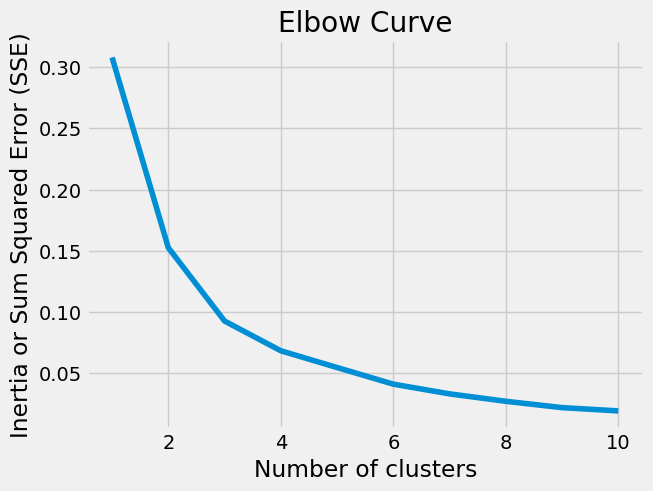

In [ ]:
# Use the Elbow method to determine the number of clusters to use to group the stocks
# Get and store the annual returns and annual variances
X = clustered_data2[['Returns', 'Variances']].values
inertia_list = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or Sum Squared Error (SSE)')
plt

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(X)
labels = kmeans.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 0], dtype=int32)

In [ ]:
clustered_data2['Cluster_Labels'] = labels
clustered_data2

,Stock_Symbols,Variances,Returns,Cluster_Labels
0,ACGL,0.027246,0.181698,0
1,AFL,0.054342,0.107003,2
2,AIG,0.096292,0.101699,2
3,AIZ,0.051317,0.172888,0
4,AJG,0.028872,0.159495,0
...,...,...,...,...
66,V,0.054841,0.242283,1
67,WFC,0.058008,0.096575,2
68,WRB,0.027939,0.157850,0
69,WTW,0.037117,0.123451,2


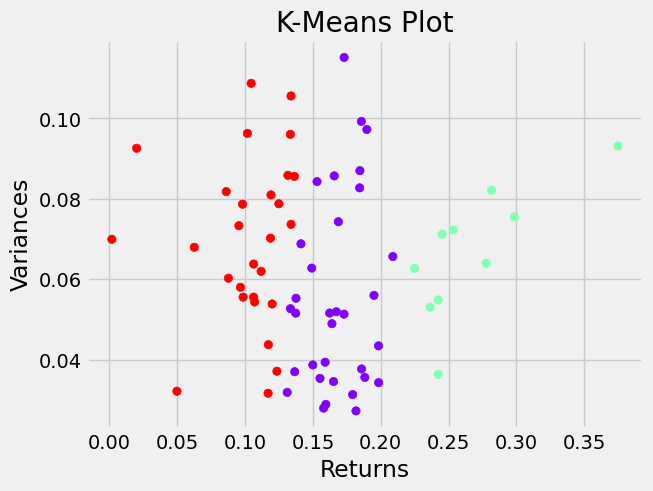

In [ ]:
# Plot and show different clusters
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()
# Group 1 is with the highest return

In [ ]:
# Create a function to create a simple diversed portfolio
def diversed_port():
  for i in range(0, 3):
    symbol = clustered_data2[clustered_data2['Cluster_Labels'] == i].head(1)
    print(symbol[['Stock_Symbols', 'Cluster_Labels']])

In [ ]:
diversed_port()

  Stock_Symbols  Cluster_Labels
0          ACGL               0
   Stock_Symbols  Cluster_Labels
26            FI               1
  Stock_Symbols  Cluster_Labels
1           AFL               2


---------------------------Random Forest--------------------------

In [1]:
import os
import sys
import requests
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as reader
import yfinance as yf

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report

In [2]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t, s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2015-01-01', end='2019-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices_2015_2019.csv', sep=',')

<ipython-input-2-ee0ecdd82e50>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-2-ee0ecdd82e50>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-2-ee0ecdd82e50>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-2-ee0ecdd82e50>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-2-ee0ecdd82e50>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [3]:
financials_data = data[data['GICS'] == 'Financials']

In [4]:
RF_data = financials_data.copy()

In [5]:
RF_data = RF_data[['Ticker','Date','Close','High','Low','Open','Volume']]
# sort the values by stock ticker and then date
RF_data.sort_values(by = ['Ticker','Date'], inplace = True)
# calculate the change in price
RF_data['change_in_price'] = RF_data['Close'].diff()

In [6]:
mask = RF_data['Ticker'] != RF_data['Ticker'].shift(1)
RF_data['change_in_price'] = np.where(mask == True, np.nan, RF_data['change_in_price'])
# The rows that have a nan value, we should get 71 rows
RF_data[RF_data.isna().any(axis = 1)]

,Ticker,Date,Close,High,Low,Open,Volume,change_in_price
55308,ACGL,2015-01-02,19.496668,19.860001,19.426666,19.733334,1101600.0,NaN
11313,AFL,2015-01-02,30.540001,30.805000,30.330000,30.750000,2846000.0,NaN
37710,AIG,2015-01-02,56.110001,56.599998,55.750000,56.529999,6608300.0,NaN
59079,AIZ,2015-01-02,67.769997,68.820000,67.480003,68.519997,452300.0,NaN
57822,AJG,2015-01-02,46.980000,47.490002,46.540001,47.250000,540200.0,NaN
...,...,...,...,...,...,...,...,...
577162,V,2015-01-02,66.254997,66.687500,65.622498,65.845001,8389600.0,NaN
588475,WFC,2015-01-02,54.700001,55.189999,54.189999,55.110001,11700900.0,NaN
76677,WRB,2015-01-02,22.511110,22.959999,22.444445,22.848888,1126125.0,NaN
598412,WTW,2015-01-02,118.013245,119.788078,116.556290,119.205299,209022.0,NaN


In [7]:
# RSI indicator: Relative Strength Index
# Determines whether the stock is overbought or oversold; when RSI is above 70 (under 30), it might indicate the stock has been overbought (oversold).

n = 14
up_df, down_df = RF_data[['Ticker','change_in_price']].copy(), RF_data[['Ticker','change_in_price']].copy()
# For up days, if the change is less than 0 set to 0.
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0
# For down days, if the change is greater than 0 set to 0.
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0
down_df['change_in_price'] = down_df['change_in_price'].abs()

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
ewma_up = up_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down
# Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
RF_data['down_days'] = down_df['change_in_price']
RF_data['up_days'] = up_df['change_in_price']
RF_data['RSI'] = relative_strength_index


In [8]:
# Indicator Calculation: Stochastic Oscillator: measures the level of the closing price relative to the low-high range over a period of time

n = 14
low_14, high_14 = RF_data[['Ticker','Low']].copy(), RF_data[['Ticker','High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((RF_data['Close'] - low_14) / (high_14 - low_14))

RF_data['low_14'] = low_14
RF_data['high_14'] = high_14
RF_data['k_percent'] = k_percent


In [9]:
# Indicator Calculation: Williams %R
# This indicator ranges from -100 to 0. When its value is above -20, it indicates a sell signal and when its value is below -80, it indicates a buy signal

n = 14
low_14, high_14 = RF_data[['Ticker','Low']].copy(), RF_data[['Ticker','High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate William %R indicator.
r_percent = ((high_14 - RF_data['Close']) / (high_14 - low_14)) * - 100

RF_data['r_percent'] = r_percent


In [10]:
# Indicator Calculation: Moving Average Convergence Divergence (MACD)
# When the MACD goes below the SingalLine, it indicates a sell signal. When it goes above the SingalLine, it indicates a buy signal.

# Calculate the MACD
ema_26 = RF_data.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = RF_data.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

RF_data['MACD'] = macd
RF_data['MACD_EMA'] = ema_9_macd


In [11]:
# Indicator Calculation: Price Rate of Change
# It measures the most recent change in price with respect to the price in n days ago.

n = 9
# Calculate the Rate of Change in the Price, and store it in the Data Frame.
RF_data['Price_Rate_Of_Change'] = RF_data.groupby('Ticker')['Close'].transform(lambda x: x.pct_change(periods = n))


In [12]:
# Indicator Calculation: On Balance Volume
# It utilizes changes in volume to estimate changes in stock prices. It cumulatively adds the volumes on days when the prices grow and subtracts the volumes on days when the prices go down.
def obv(group):

    volume = group['Volume']
    change = group['Close'].diff()
    prev_obv = 0
    obv_values = []

    # calculate the On Balance Volume
    for i, j in zip(change, volume):

        if i > 0:
            current_obv = prev_obv + j
        elif i < 0:
            current_obv = prev_obv - j
        else:
            current_obv = prev_obv

        prev_obv = current_obv
        obv_values.append(current_obv)

    return pd.Series(obv_values, index = group.index)


obv_groups = RF_data.groupby('Ticker').apply(obv)

# add to the data frame, but drop the old index, before adding it.
RF_data['On Balance Volume'] = obv_groups.reset_index(level=0, drop=True)


In [13]:
# Create the prediction column. The goal is to predict whether the next day is a down_day or an up_day --> classification
# Returns -1 for negative values (down days), returns 1 for positive values (up days) and 0 for no change (flat days)
close_groups = RF_data.groupby('Ticker')['Close']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff()))

RF_data['Prediction'] = close_groups

# To keep this as a binary classifier I'll change flat days and consider them up days.
RF_data.loc[RF_data['Prediction'] == 0.0] = 1.0


In [14]:
RF_data['Prediction'] = RF_data.groupby('Ticker')['Prediction'].shift(-1)

last_rows_indices = RF_data.groupby('Ticker').tail(1).index
RF_data = RF_data.drop(last_rows_indices)


In [15]:
# Remove NaN values
print('Before NaN Drop we have {} rows and {} columns'.format(RF_data.shape[0], RF_data.shape[1]))
# Any row that has a `NaN` value will be dropped.
RF_data = RF_data.dropna()
print('After NaN Drop we have {} rows and {} columns'.format(RF_data.shape[0], RF_data.shape[1]))


Before NaN Drop we have 89049 rows and 20 columns
After NaN Drop we have 88130 rows and 20 columns


In [16]:
# Split the data (80%:20%).

#X_Cols = RF_data[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume']]
X_Cols = RF_data[['MACD']]
Y_Cols = RF_data['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)
rand_frst_clf.fit(X_train, y_train)

y_pred = rand_frst_clf.predict(X_test)

In [17]:
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

Correct Prediction (%):  50.46521127399809


In [18]:
target_names = ['Down Day', 'Up Day']
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,0.463977,0.464342,0.464159,10180.000000
Up Day,0.539637,0.539273,0.539455,11853.000000
accuracy,0.504652,0.504652,0.504652,0.504652
macro avg,0.501807,0.501807,0.501807,22033.000000
weighted avg,0.504680,0.504652,0.504666,22033.000000


Accuracy: 0.5018073023549616
Percision: 0.5016813195491377
Recall: 0.5392727579515735
Specificity: 0.4643418467583497


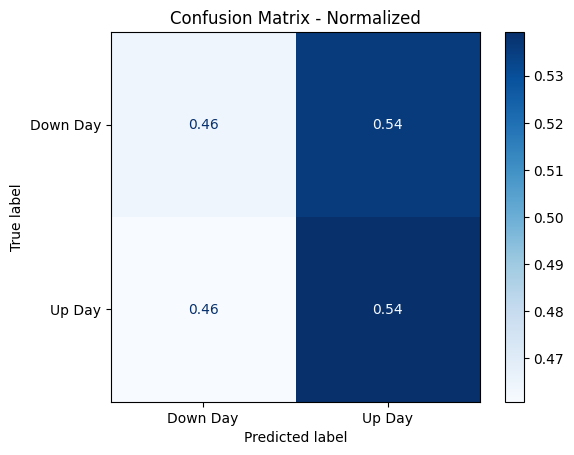

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix, display_labels=['Down Day', 'Up Day'])
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

In [20]:
# Feature importance
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

MACD    1.0
dtype: float64

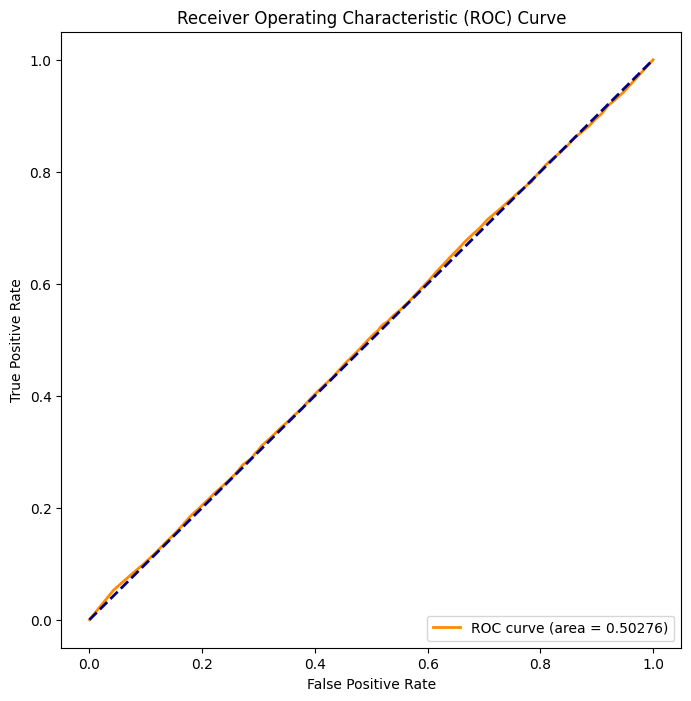

In [21]:
# ROC curve for model evaluation

y_scores = rand_frst_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Model improvement

# Number of trees in random forest
n_estimators = list(range(200, 2000, 200))

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

# Maximum number of levels in tree
max_depth = list(range(10, 110, 10))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30, 40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 7, 12, 14, 16 ,20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 20, 30, 40], 'min_samples_leaf': [1, 2, 7, 12, 14, 16, 20], 'bootstrap': [True, False]}


In [23]:
# New Random Forest Classifier to house optimal parameters
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 7, 12, 14,
                                                             16, 20],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

In [24]:
rf_random.predict(X_test)
print('Correct Prediction (%): ', accuracy_score(y_test, rf_random.predict(X_test), normalize = True) * 100.0)

target_names = ['Down Day', 'Up Day']

report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

report_df = pd.DataFrame(report).transpose()
display(report_df)
print('\n')

feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
display(feature_imp)

Correct Prediction (%):  53.71034357554577


,precision,recall,f1-score,support
Down Day,0.463977,0.464342,0.464159,10180.000000
Up Day,0.539637,0.539273,0.539455,11853.000000
accuracy,0.504652,0.504652,0.504652,0.504652
macro avg,0.501807,0.501807,0.501807,22033.000000
weighted avg,0.504680,0.504652,0.504666,22033.000000


MACD    1.0
dtype: float64

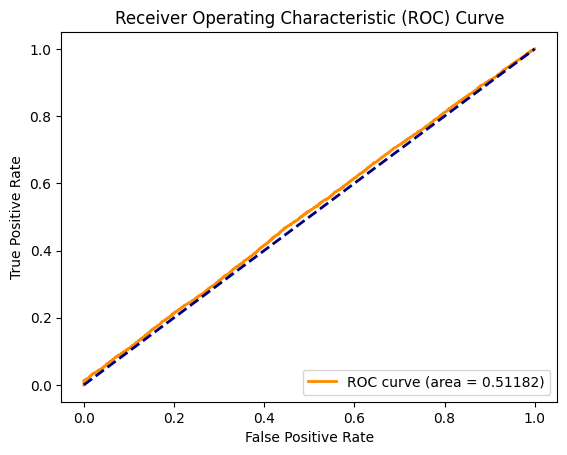

In [25]:
y_scores = rf_random.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

In [26]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t, s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2020-01-01', end='2023-11-20', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices_2020_2023.csv', sep=',')

<ipython-input-26-2b250842525a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-26-2b250842525a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-26-2b250842525a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-26-2b250842525a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
<ipython-input-26-2b250842525a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

KeyboardInterrupt: ignored

In [ ]:
financials_data2020 = data[data['GICS'] == 'Financials']

In [ ]:
financials_data2020 = financials_data2020[['Ticker','Date','Close','High','Low','Open','Volume']]
financials_data2020.sort_values(by = ['Ticker','Date'], inplace = True)
financials_data2020['change_in_price'] = financials_data2020['Close'].diff()

In [ ]:
mask = financials_data2020['Ticker'] != financials_data2020['Ticker'].shift(1)
financials_data2020['change_in_price'] = np.where(mask == True, np.nan, financials_data2020['change_in_price'])
financials_data2020[financials_data2020.isna().any(axis = 1)]

In [ ]:
n = 14
up_df, down_df = financials_data2020[['Ticker','change_in_price']].copy(), financials_data2020[['Ticker','change_in_price']].copy()
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0
down_df['change_in_price'] = down_df['change_in_price'].abs()

ewma_up = up_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

relative_strength = ewma_up / ewma_down
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

financials_data2020['down_days'] = down_df['change_in_price']
financials_data2020['up_days'] = up_df['change_in_price']
financials_data2020['RSI'] = relative_strength_index


In [ ]:
n = 14
low_14, high_14 = financials_data2020[['Ticker','Low']].copy(), financials_data2020[['Ticker','High']].copy()

low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

k_percent = 100 * ((financials_data2020['Close'] - low_14) / (high_14 - low_14))

financials_data2020['low_14'] = low_14
financials_data2020['high_14'] = high_14
financials_data2020['k_percent'] = k_percent

financials_data2020.head(20)

In [ ]:
n = 14
low_14, high_14 = financials_data2020[['Ticker','Low']].copy(), financials_data2020[['Ticker','High']].copy()

low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

r_percent = ((high_14 - financials_data2020['Close']) / (high_14 - low_14)) * - 100

financials_data2020['r_percent'] = r_percent


In [ ]:
ema_26 = financials_data2020.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = financials_data2020.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

ema_9_macd = macd.ewm(span = 9).mean()

financials_data2020['MACD'] = macd
financials_data2020['MACD_EMA'] = ema_9_macd


In [ ]:
n = 9
financials_data2020['Price_Rate_Of_Change'] = financials_data2020.groupby('Ticker')['Close'].transform(lambda x: x.pct_change(periods = n))


In [ ]:
def obv(group):

    volume = group['Volume']
    change = group['Close'].diff()
    prev_obv = 0
    obv_values = []

    for i, j in zip(change, volume):

        if i > 0:
            current_obv = prev_obv + j
        elif i < 0:
            current_obv = prev_obv - j
        else:
            current_obv = prev_obv

        prev_obv = current_obv
        obv_values.append(current_obv)

    return pd.Series(obv_values, index = group.index)


obv_groups = financials_data2020.groupby('Ticker').apply(obv)

financials_data2020['On Balance Volume'] = obv_groups.reset_index(level=0, drop=True)


In [ ]:
financials_data2020 = financials_data2020.dropna()

In [ ]:
features = ['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume']
predictions_df = pd.DataFrame()

for index, row in financials_data2020.iterrows():
    X_single_row = row[features].values.reshape(1, -1)
    y_pred_single_row = rf_random.predict(X_single_row)
    prediction_row = pd.DataFrame({'y_pred': y_pred_single_row}, index=[index])
    predictions_df = pd.concat([predictions_df, prediction_row])

financials_data2020 = pd.concat([financials_data2020, predictions_df], axis=1)
financials_data2020.head()

In [ ]:
financials_data2020['Returns'] = financials_data2020.groupby('Ticker')['Close'].pct_change()
#financials_data2020['CumRets']=(1+financials_data2020['Returns']).cumprod()-1

In [ ]:
portfolio_predictions = pd.DataFrame(index=financials_data2020['Date'].unique())

for stock_name in financials_data2020['Ticker'].unique():
    stock_data = financials_data2020[financials_data2020['Ticker'] == stock_name]

    portfolio_predictions[stock_name] = stock_data.set_index('Date')['y_pred']

portfolio_weights = pd.DataFrame(index=financials_data2020['Date'].unique())
portfolio_weights['Weights'] = 1 / portfolio_predictions.eq(1).sum(axis=1)
portfolio_predictions = portfolio_predictions.replace(-1, 0)
portfolio_predictions.head()

In [ ]:
portfolio_returns = pd.DataFrame(index=financials_data2020['Date'].unique())

for stock_name in financials_data2020['Ticker'].unique():
    stock_data = financials_data2020[financials_data2020['Ticker'] == stock_name]

    portfolio_returns[stock_name] = stock_data.set_index('Date')['Returns']
portfolio_returns = portfolio_returns.fillna(0)
portfolio_returns.head()

In [ ]:
portfolio = pd.DataFrame(index=portfolio_predictions.index)
portfolio['Portfolio_Sum'] = (portfolio_predictions * portfolio_returns).sum(axis=1)
portfolio['Portfolio_Sum'] = (portfolio['Portfolio_Sum'] * portfolio_weights['Weights'])
portfolio

In [ ]:
portfolio['CumRets']=(1+portfolio['Portfolio_Sum']).cumprod()-1

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio.index, y=portfolio['CumRets'], mode='lines',line=dict(color='red'), name='Random Forest Portfolio Construction'))
fig.update_layout(
    title={'text':'Cumulative Performance from 2020 - S&P 500 Financials',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

Include 2008 Financial Crises to train a model and see how it performs during the pandemic

In [ ]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t, s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2007-01-01', end='2016-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices_2007_2016.csv', sep=',')

In [ ]:
financials_data = data[data['GICS'] == 'Financials']

In [ ]:
RF_data = financials_data.copy()

In [ ]:
RF_data = RF_data[['Ticker','Date','Close','High','Low','Open','Volume']]
RF_data.sort_values(by = ['Ticker','Date'], inplace = True)
RF_data['change_in_price'] = RF_data['Close'].diff()

In [ ]:
mask = RF_data['Ticker'] != RF_data['Ticker'].shift(1)
RF_data['change_in_price'] = np.where(mask == True, np.nan, RF_data['change_in_price'])
RF_data[RF_data.isna().any(axis = 1)]

In [ ]:
n = 14
up_df, down_df = RF_data[['Ticker','change_in_price']].copy(), RF_data[['Ticker','change_in_price']].copy()
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0
down_df['change_in_price'] = down_df['change_in_price'].abs()

ewma_up = up_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

relative_strength = ewma_up / ewma_down
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

RF_data['down_days'] = down_df['change_in_price']
RF_data['up_days'] = up_df['change_in_price']
RF_data['RSI'] = relative_strength_index


In [ ]:
n = 14
low_14, high_14 = RF_data[['Ticker','Low']].copy(), RF_data[['Ticker','High']].copy()

low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

k_percent = 100 * ((RF_data['Close'] - low_14) / (high_14 - low_14))

RF_data['low_14'] = low_14
RF_data['high_14'] = high_14
RF_data['k_percent'] = k_percent


In [ ]:
n = 14
low_14, high_14 = RF_data[['Ticker','Low']].copy(), RF_data[['Ticker','High']].copy()

low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

r_percent = ((high_14 - RF_data['Close']) / (high_14 - low_14)) * - 100

RF_data['r_percent'] = r_percent


In [ ]:
ema_26 = RF_data.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = RF_data.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

ema_9_macd = macd.ewm(span = 9).mean()

RF_data['MACD'] = macd
RF_data['MACD_EMA'] = ema_9_macd


In [ ]:
n = 9
RF_data['Price_Rate_Of_Change'] = RF_data.groupby('Ticker')['Close'].transform(lambda x: x.pct_change(periods = n))


In [ ]:
def obv(group):

    volume = group['Volume']
    change = group['Close'].diff()
    prev_obv = 0
    obv_values = []

    for i, j in zip(change, volume):

        if i > 0:
            current_obv = prev_obv + j
        elif i < 0:
            current_obv = prev_obv - j
        else:
            current_obv = prev_obv

        prev_obv = current_obv
        obv_values.append(current_obv)

    return pd.Series(obv_values, index = group.index)


obv_groups = RF_data.groupby('Ticker').apply(obv)

RF_data['On Balance Volume'] = obv_groups.reset_index(level=0, drop=True)


In [ ]:
close_groups = RF_data.groupby('Ticker')['Close']

close_groups = close_groups.transform(lambda x : np.sign(x.diff()))

RF_data['Prediction'] = close_groups

RF_data.loc[RF_data['Prediction'] == 0.0] = 1.0

In [ ]:
RF_data['Prediction'] = RF_data.groupby('Ticker')['Prediction'].shift(-1)

last_rows_indices = RF_data.groupby('Ticker').tail(1).index
RF_data = RF_data.drop(last_rows_indices)

In [ ]:
print('Before NaN Drop we have {} rows and {} columns'.format(RF_data.shape[0], RF_data.shape[1]))
RF_data = RF_data.dropna()
print('After NaN Drop we have {} rows and {} columns'.format(RF_data.shape[0], RF_data.shape[1]))

In [ ]:
X_Cols = RF_data[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume']]
Y_Cols = RF_data['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)
rand_frst_clf.fit(X_train, y_train)

y_pred = rand_frst_clf.predict(X_test)

In [ ]:
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

In [ ]:
target_names = ['Down Day', 'Up Day']
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix, display_labels=['Down Day', 'Up Day'])
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

In [ ]:
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

In [ ]:
y_scores = rand_frst_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
n_estimators = list(range(200, 2000, 200))

max_features = ['auto', 'sqrt', None, 'log2']

max_depth = list(range(10, 110, 10))
max_depth.append(None)

min_samples_split = [2, 5, 10, 20, 30, 40]
min_samples_leaf = [1, 2, 7, 12, 14, 16 ,20]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

In [ ]:
rf_random.predict(X_test)
print('Correct Prediction (%): ', accuracy_score(y_test, rf_random.predict(X_test), normalize = True) * 100.0)

target_names = ['Down Day', 'Up Day']

report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

report_df = pd.DataFrame(report).transpose()
display(report_df)
print('\n')

feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
display(feature_imp)

In [ ]:
y_scores = rf_random.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

In [ ]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t, s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2017-01-01', end='2023-11-20', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices_2017_2023.csv', sep=',')

In [ ]:
financials_data2017 = data[data['GICS'] == 'Financials']

In [ ]:
financials_data2017 = financials_data2017[['Ticker','Date','Close','High','Low','Open','Volume']]
financials_data2017.sort_values(by = ['Ticker','Date'], inplace = True)
financials_data2017['change_in_price'] = financials_data2017['Close'].diff()

In [ ]:
mask = financials_data2017['Ticker'] != financials_data2017['Ticker'].shift(1)
financials_data2017['change_in_price'] = np.where(mask == True, np.nan, financials_data2017['change_in_price'])
financials_data2017[financials_data2017.isna().any(axis = 1)]

In [ ]:
n = 14
up_df, down_df = financials_data2017[['Ticker','change_in_price']].copy(), financials_data2017[['Ticker','change_in_price']].copy()
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0
down_df['change_in_price'] = down_df['change_in_price'].abs()

ewma_up = up_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

relative_strength = ewma_up / ewma_down
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

financials_data2017['down_days'] = down_df['change_in_price']
financials_data2017['up_days'] = up_df['change_in_price']
financials_data2017['RSI'] = relative_strength_index

financials_data2017.head(20)

In [ ]:
n = 14
low_14, high_14 = financials_data2017[['Ticker','Low']].copy(), financials_data2017[['Ticker','High']].copy()

low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

k_percent = 100 * ((financials_data2017['Close'] - low_14) / (high_14 - low_14))

financials_data2017['low_14'] = low_14
financials_data2017['high_14'] = high_14
financials_data2017['k_percent'] = k_percent

In [ ]:
n = 14
low_14, high_14 = financials_data2017[['Ticker','Low']].copy(), financials_data2017[['Ticker','High']].copy()

low_14 = low_14.groupby('Ticker')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['High'].transform(lambda x: x.rolling(window = n).max())

r_percent = ((high_14 - financials_data2017['Close']) / (high_14 - low_14)) * - 100

financials_data2017['r_percent'] = r_percent

In [ ]:
ema_26 = financials_data2017.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = financials_data2017.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

ema_9_macd = macd.ewm(span = 9).mean()

financials_data2017['MACD'] = macd
financials_data2017['MACD_EMA'] = ema_9_macd

In [ ]:
n = 9
financials_data2017['Price_Rate_Of_Change'] = financials_data2017.groupby('Ticker')['Close'].transform(lambda x: x.pct_change(periods = n))

In [ ]:
def obv(group):

    volume = group['Volume']
    change = group['Close'].diff()
    prev_obv = 0
    obv_values = []

    for i, j in zip(change, volume):

        if i > 0:
            current_obv = prev_obv + j
        elif i < 0:
            current_obv = prev_obv - j
        else:
            current_obv = prev_obv

        prev_obv = current_obv
        obv_values.append(current_obv)

    return pd.Series(obv_values, index = group.index)


obv_groups = financials_data2017.groupby('Ticker').apply(obv)

financials_data2017['On Balance Volume'] = obv_groups.reset_index(level=0, drop=True)

In [ ]:
financials_data2017 = financials_data2017.dropna()

In [ ]:
features = ['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume']
predictions_df = pd.DataFrame()

for index, row in financials_data2017.iterrows():
    X_single_row = row[features].values.reshape(1, -1)
    y_pred_single_row = rf_random.predict(X_single_row)
    prediction_row = pd.DataFrame({'y_pred': y_pred_single_row}, index=[index])
    predictions_df = pd.concat([predictions_df, prediction_row])

financials_data2017 = pd.concat([financials_data2017, predictions_df], axis=1)

In [ ]:
financials_data2017['Returns'] = financials_data2017.groupby('Ticker')['Close'].pct_change()

In [ ]:
portfolio_predictions = pd.DataFrame(index=financials_data2017['Date'].unique())

for stock_name in financials_data2017['Ticker'].unique():
    stock_data = financials_data2017[financials_data2017['Ticker'] == stock_name]

    portfolio_predictions[stock_name] = stock_data.set_index('Date')['y_pred']

portfolio_weights = pd.DataFrame(index=financials_data2017['Date'].unique())
portfolio_weights['Weights'] = 1 / portfolio_predictions.eq(1).sum(axis=1)
portfolio_predictions = portfolio_predictions.replace(-1, 0)
portfolio_predictions.head()

In [ ]:
portfolio_returns = pd.DataFrame(index=financials_data2017['Date'].unique())

for stock_name in financials_data2017['Ticker'].unique():
    stock_data = financials_data2017[financials_data2017['Ticker'] == stock_name]

    portfolio_returns[stock_name] = stock_data.set_index('Date')['Returns']
portfolio_returns = portfolio_returns.fillna(0)

In [ ]:
portfolio = pd.DataFrame(index=portfolio_predictions.index)
portfolio['Portfolio_Sum'] = (portfolio_predictions * portfolio_returns).sum(axis=1)
portfolio['Portfolio_Sum'] = (portfolio['Portfolio_Sum'] * portfolio_weights['Weights'])

In [ ]:
portfolio['CumRets']=(1+portfolio['Portfolio_Sum']).cumprod()-1

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio.index, y=portfolio['CumRets'], mode='lines',line=dict(color='red'), name='Random Forest Portfolio Construction'))
fig.update_layout(
    title={'text':'Cumulative Performance from 2017 - S&P 500 Financials',
           'y':0.9,
        'x':0.5,
          'xanchor': 'center',
             'yanchor': 'top' },

    xaxis=dict(
        title='',
        #ticksuffix="%",
        #tickprefix=''
    ),

    yaxis=dict(
        title='Returns',
         ticksuffix=""
    ),


    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)



fig

———————————————————————————————Gradient Boosting Test—————————————————————————————————————